In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
!echo $CUDA_VISIBLE_DEVICES

0


In [2]:
import sys
sys.path.insert(0, "../")

import os
os.chdir("../")

In [3]:
problems = ["dw4", "lj13", "qm9"]
problem = problems[1]
if problem == "dw4":
    dim = 2
    n_nodes = 4
    from examples.dw4 import *
    import target.double_well as dw4
    target_log_prob_fn = dw4.log_prob_fn
elif problem == "lj13":
    dim = 3
    n_nodes = 13
    from examples.lj13 import *
    import target.leonard_jones as lj13
    target_log_prob_fn = lj13.log_prob_fn
else:
    dim = 3
    n_nodes = 19
    from examples.qm9 import *
    target_log_prob_fn = None

/scratch/lim24/augmented-equivariant-flows/examples/train.py:10: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
2023-02-17 17:57:18.924520: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-17 17:57:18.924687: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-17 17:57:18.924704: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

In [4]:
from examples.train import plot_sample_hist, eval_fn, original_dataset_to_joint_dataset, default_plotter
import yaml
import jax
import matplotlib.pyplot as plt

In [5]:
USE_64_BIT = False
if USE_64_BIT:
    from jax.config import config
    config.update("jax_enable_x64", True)

In [6]:
cfg = DictConfig(yaml.safe_load(open(f"examples/config/{problem}.yaml")))
cfg

{'hydra': {'job': {'chdir': False}}, 'target': {'aug_global_centering': False, 'aug_scale': 1.0}, 'flow': {'base': {'aug_scale_init': '${target.aug_scale}', 'double_centered_gaussian': False}, 'dim': 3, 'nodes': 13, 'n_layers': 4, 'identity_init': True, 'type': 'proj', 'kwargs': {'proj': {'global_frame': False, 'process_flow_params_jointly': False, 'condition_on_x_proj': False, 'gram_schmidt': False}, 'proj_v2': {'process_flow_params_jointly': False, 'condition_on_x_proj': False, 'gram_schmidt': False, 'n_vectors': 10}}, 'act_norm': False, 'fast_compile': True, 'compile_n_unroll': 1, 'nets': {'use_mace': False, 'mace': {'n_invariant_feat_hidden': 16, 'n_vectors_hidden': 16, 'bessel_number': 'int', 'r_max': 5.0}, 'egnn': {'mlp_units': [32, 32], 'n_layers': 3, 'h_linear_softmax': True, 'h_embedding_dim': 16}, 'transformer': {'mlp_units': [32, 32], 'num_heads': 3, 'key_size': 4, 'w_init_scale': 1.0}, 'mlp_head_config': {'mlp_units': [32, 32]}}}, 'training': {'lr': '6e-4', 'use_64_bit': Fa

# Train

In [7]:
cfg.training.lr = 5e-5
cfg.flow.n_layers=4
cfg.flow.type = ['proj']
cfg.flow.nets.use_mace = True

# Mace params.
cfg.flow.nets.mace.bessel_number = 10
cfg.flow.nets.mace.r_max = 10.
cfg.flow.nets.mace.n_vectors_hidden = 10
cfg.flow.nets.mace.n_invariant_feat_hidden = 10

cfg.training.batch_size = 64
cfg.training.n_epoch = 200
cfg.training.save = False
cfg.training.plot_batch_size = 64
cfg.logger = DictConfig({"list_logger": None})

cfg.flow.act_norm = False

creating flow of type ['proj']
training data shape of (960, 13, 3)


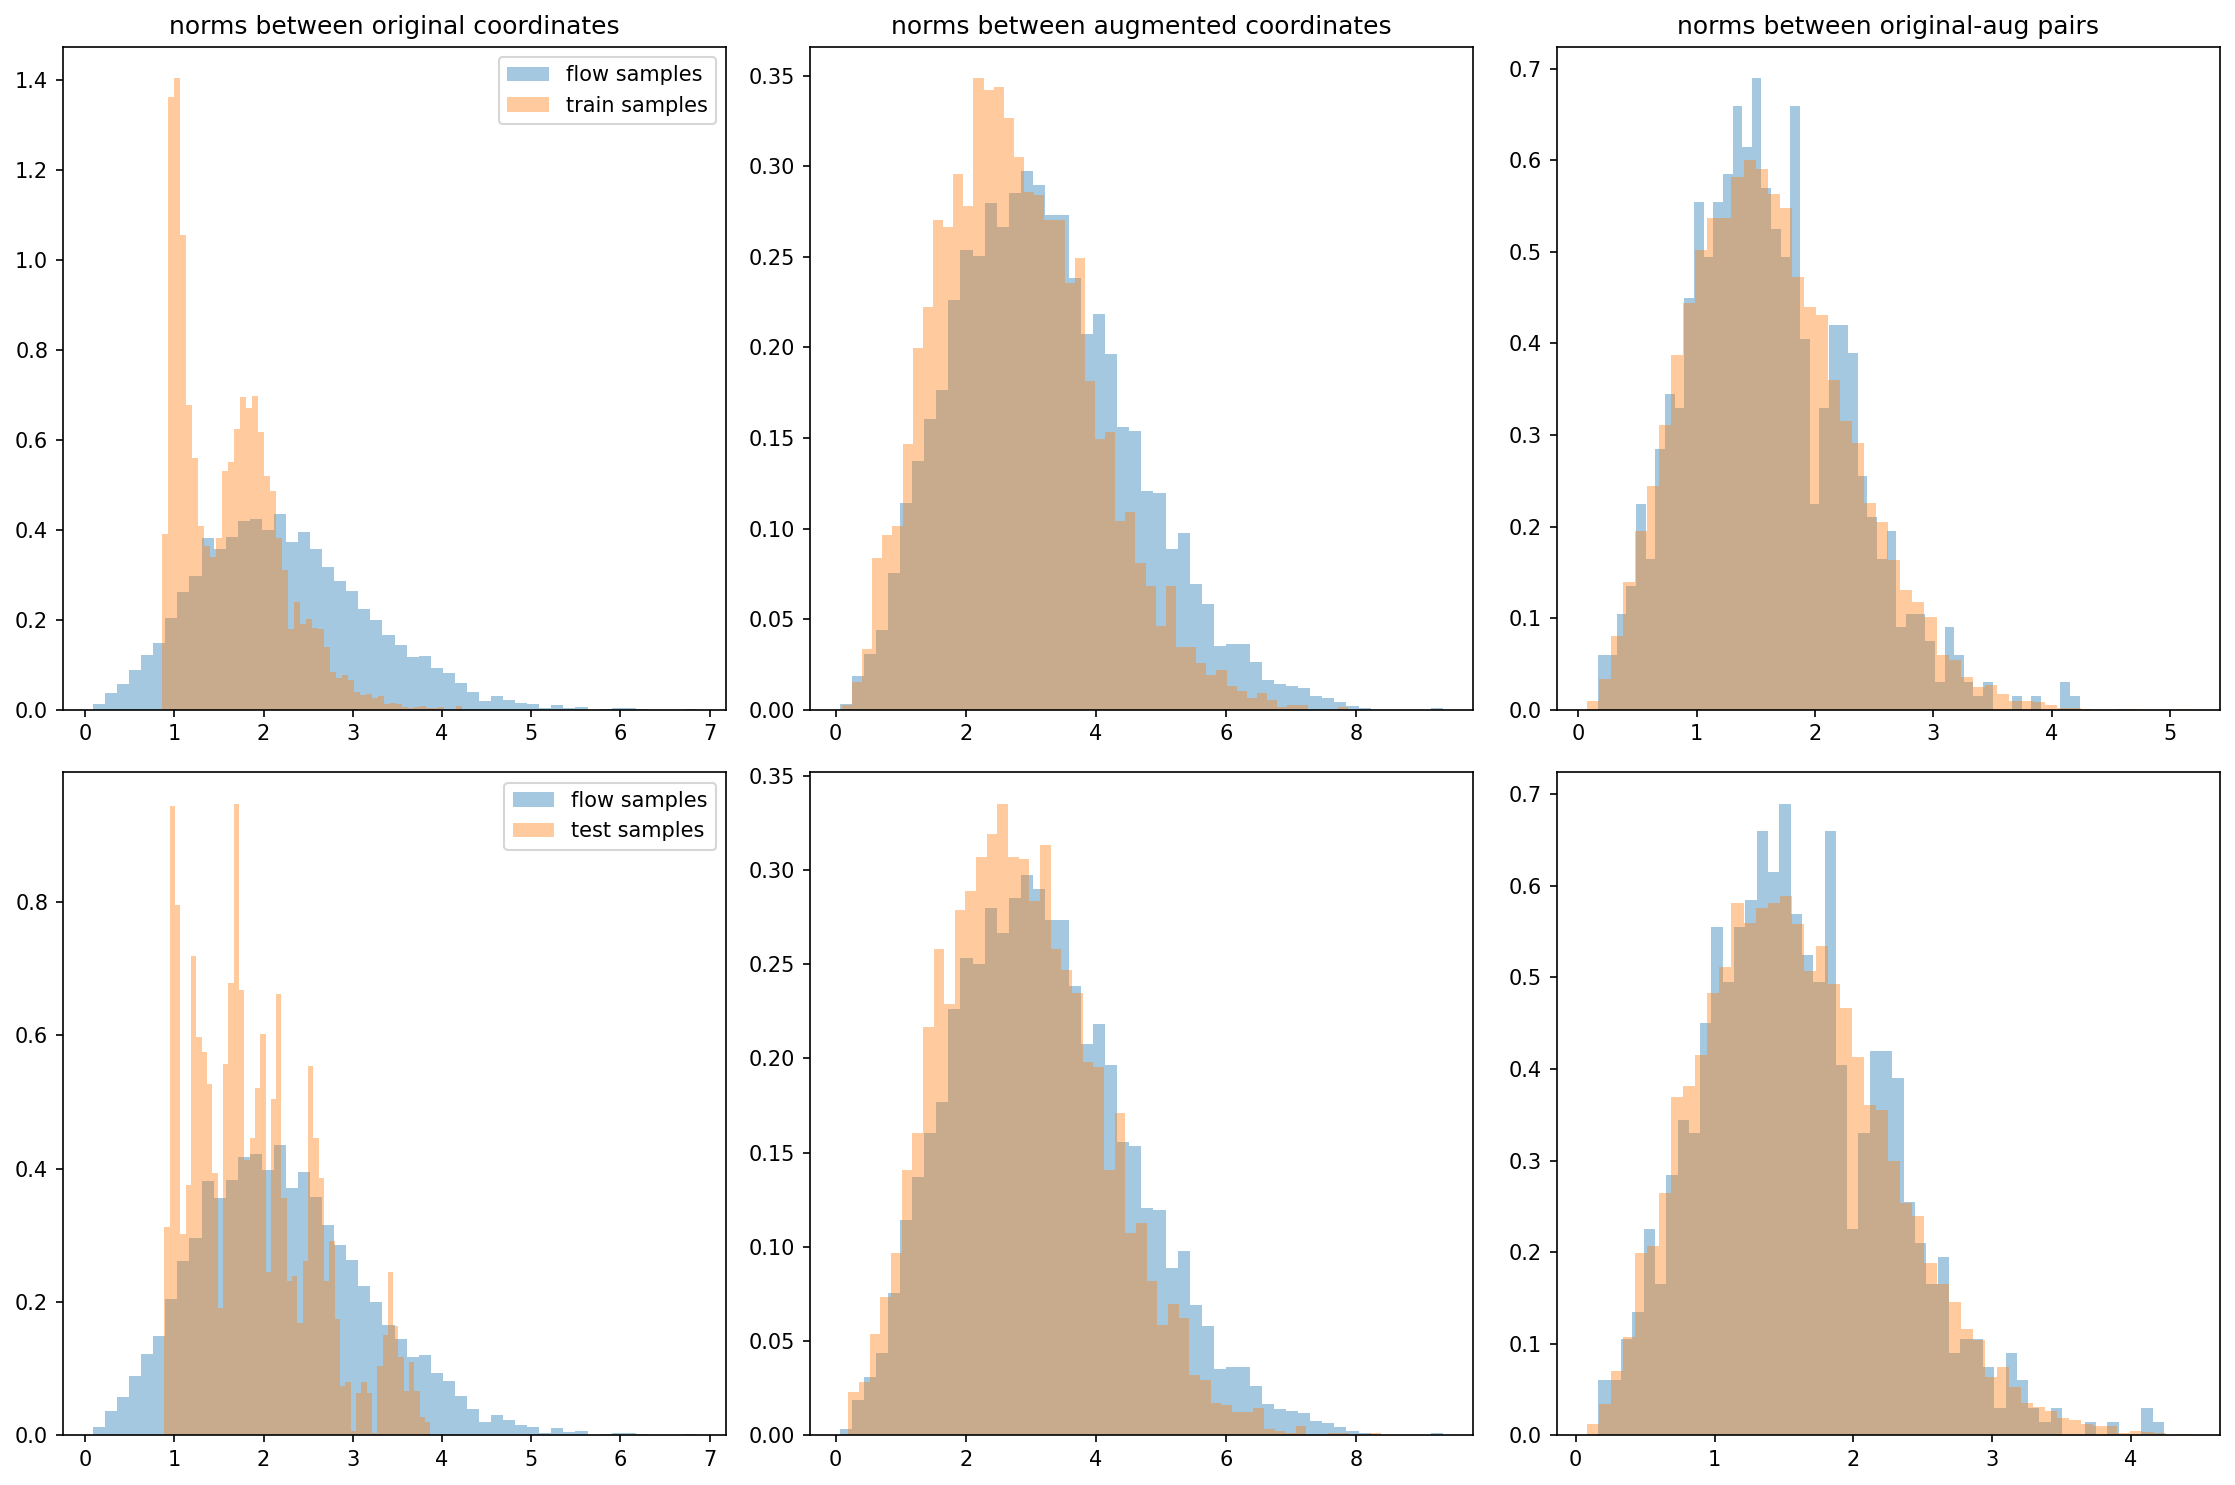

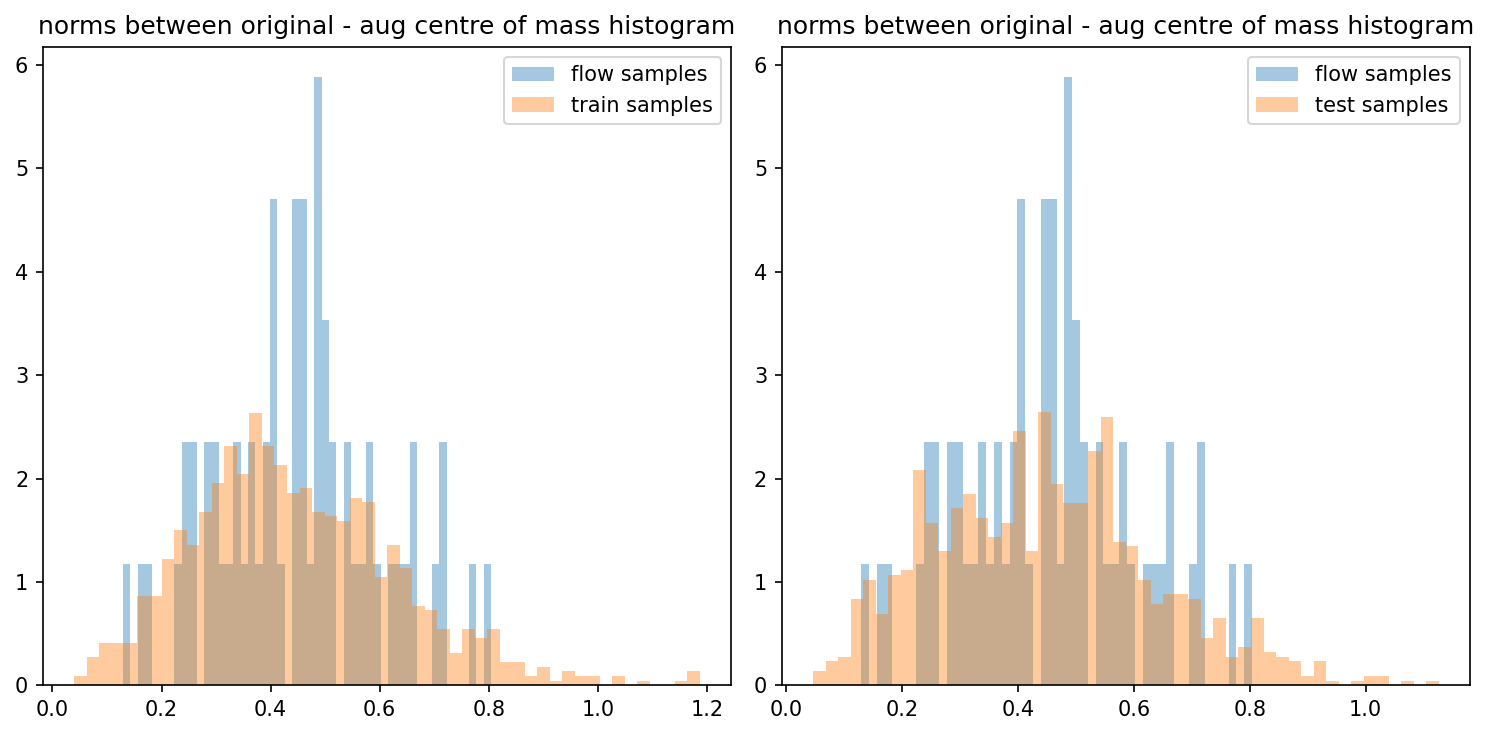

  0%|                                                   | 0/200 [00:00<?, ?it/s]

non numeric history values being saved


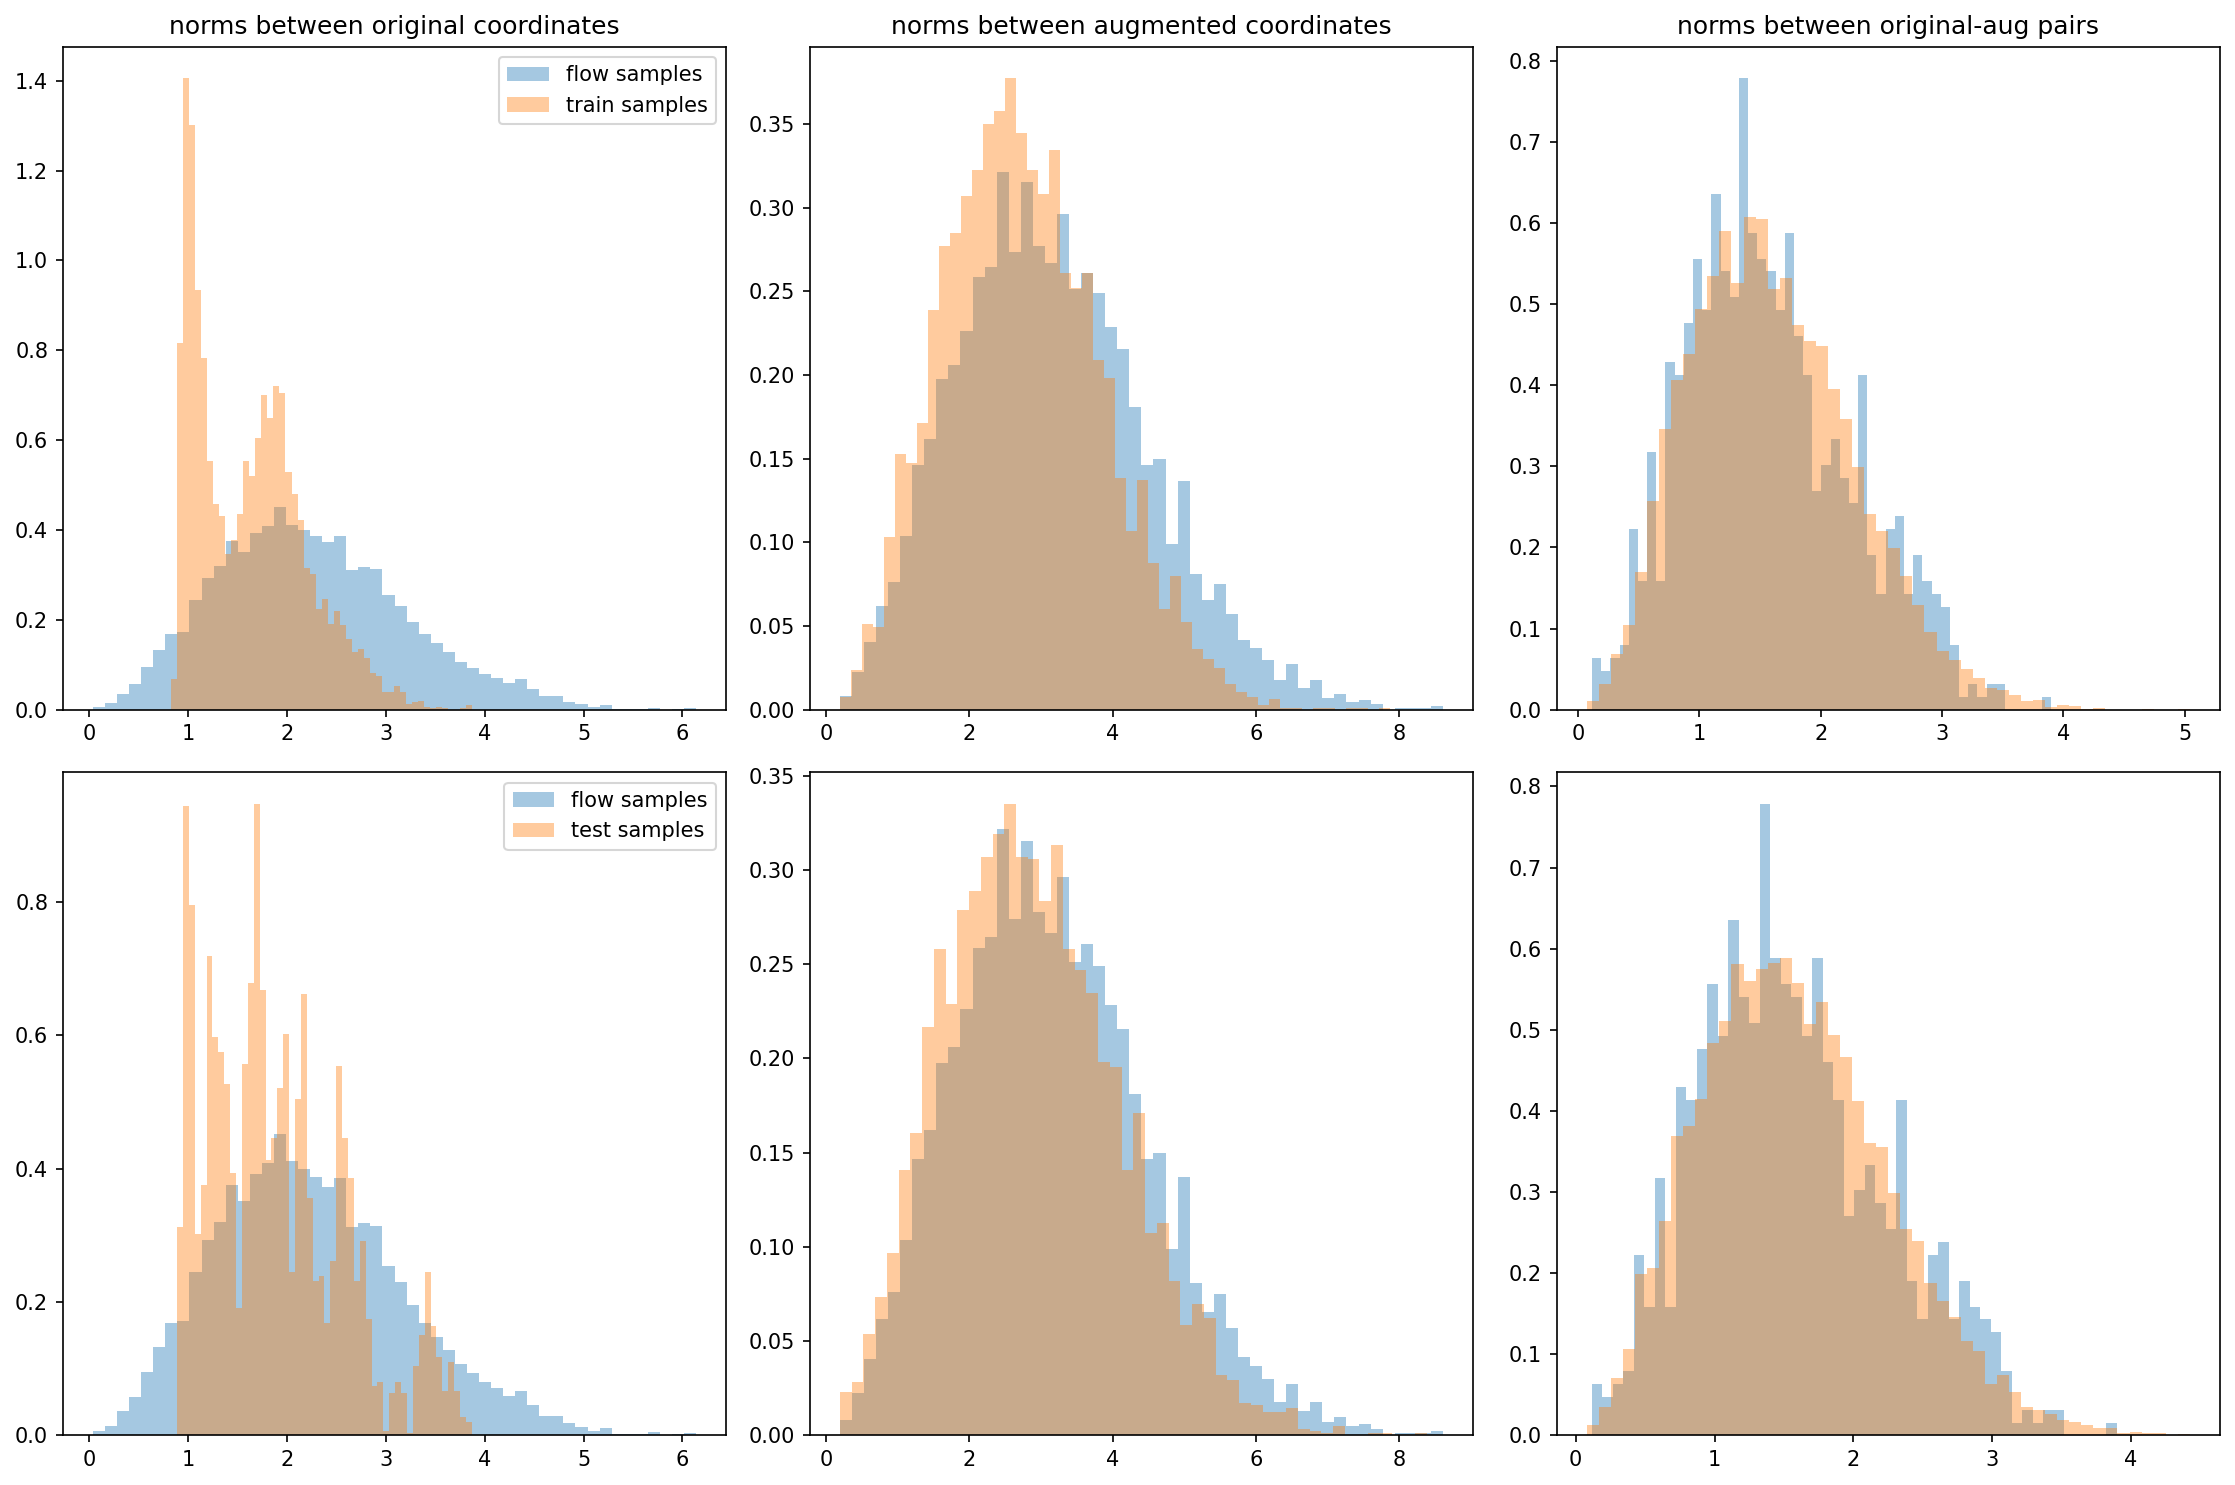

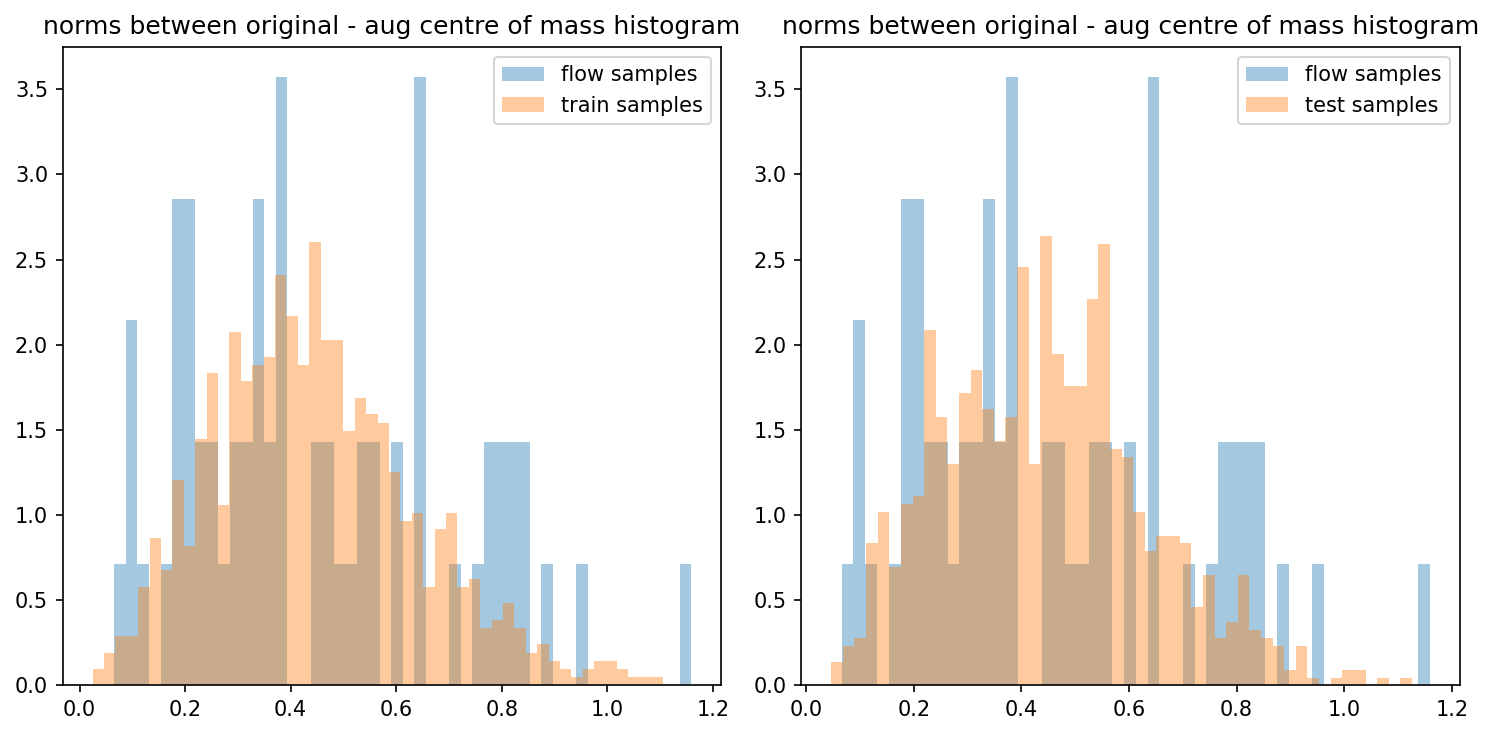

  0%|▏                                        | 1/200 [00:57<3:10:59, 57.59s/it]

{'eval_log_lik': Array(nan, dtype=float32), 'eval_marginal_log_lik': Array(nan, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_aug_orig_norm': Array(0.42800432, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5286255, dtype=float32)}


  1%|▍                                        | 2/200 [00:58<1:20:13, 24.31s/it]

nan grad
nan grad
nan grad


  2%|▋                                          | 3/200 [00:59<44:43, 13.62s/it]

nan grad
nan grad


  2%|▊                                          | 4/200 [01:00<28:06,  8.60s/it]

nan grad


  2%|█                                          | 5/200 [01:01<18:58,  5.84s/it]

nan grad


  3%|█▎                                         | 6/200 [01:02<13:27,  4.16s/it]

nan grad
nan grad


  4%|█▌                                         | 7/200 [01:03<09:59,  3.11s/it]

nan grad
nan grad
nan grad


  4%|█▋                                         | 8/200 [01:04<07:41,  2.41s/it]

nan grad
nan grad


  4%|█▉                                         | 9/200 [01:05<06:10,  1.94s/it]

nan grad
nan grad
nan grad
nan grad
nan grad


  5%|██                                        | 10/200 [01:06<05:26,  1.72s/it]

nan grad
nan grad
nan grad
nan grad
nan grad


  6%|██▎                                       | 11/200 [01:07<04:37,  1.47s/it]

nan grad
nan grad
nan grad
nan grad


  6%|██▌                                       | 12/200 [01:08<04:04,  1.30s/it]

nan grad
nan grad


  6%|██▋                                       | 13/200 [01:08<03:40,  1.18s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


  7%|██▉                                       | 14/200 [01:09<03:24,  1.10s/it]

nan grad
nan grad
nan grad


  8%|███▏                                      | 15/200 [01:10<03:12,  1.04s/it]

nan grad
nan grad
nan grad
nan grad


  8%|███▎                                      | 16/200 [01:11<03:04,  1.00s/it]

nan grad
nan grad
nan grad
nan grad


  8%|███▌                                      | 17/200 [01:12<02:58,  1.03it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


  9%|███▊                                      | 18/200 [01:13<02:53,  1.05it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 10%|███▉                                      | 19/200 [01:14<02:51,  1.06it/s]

nan grad
nan grad
nan grad
nan grad


 10%|████▏                                     | 20/200 [01:15<02:48,  1.07it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 10%|████▍                                     | 21/200 [01:16<02:46,  1.08it/s]

nan grad
nan grad
nan grad
nan grad


 11%|████▌                                     | 22/200 [01:17<02:44,  1.08it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 12%|████▊                                     | 23/200 [01:18<03:06,  1.05s/it]

{'eval_log_lik': Array(nan, dtype=float32), 'eval_marginal_log_lik': Array(nan, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_aug_orig_norm': Array(0.34136644, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5398799, dtype=float32)}


 12%|█████                                     | 24/200 [01:19<02:58,  1.01s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 12%|█████▎                                    | 25/200 [01:20<02:51,  1.02it/s]

nan grad
nan grad
nan grad
nan grad


 13%|█████▍                                    | 26/200 [01:21<02:47,  1.04it/s]

nan grad
nan grad
nan grad
nan grad


 14%|█████▋                                    | 27/200 [01:22<02:43,  1.06it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 14%|█████▉                                    | 28/200 [01:23<02:41,  1.07it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


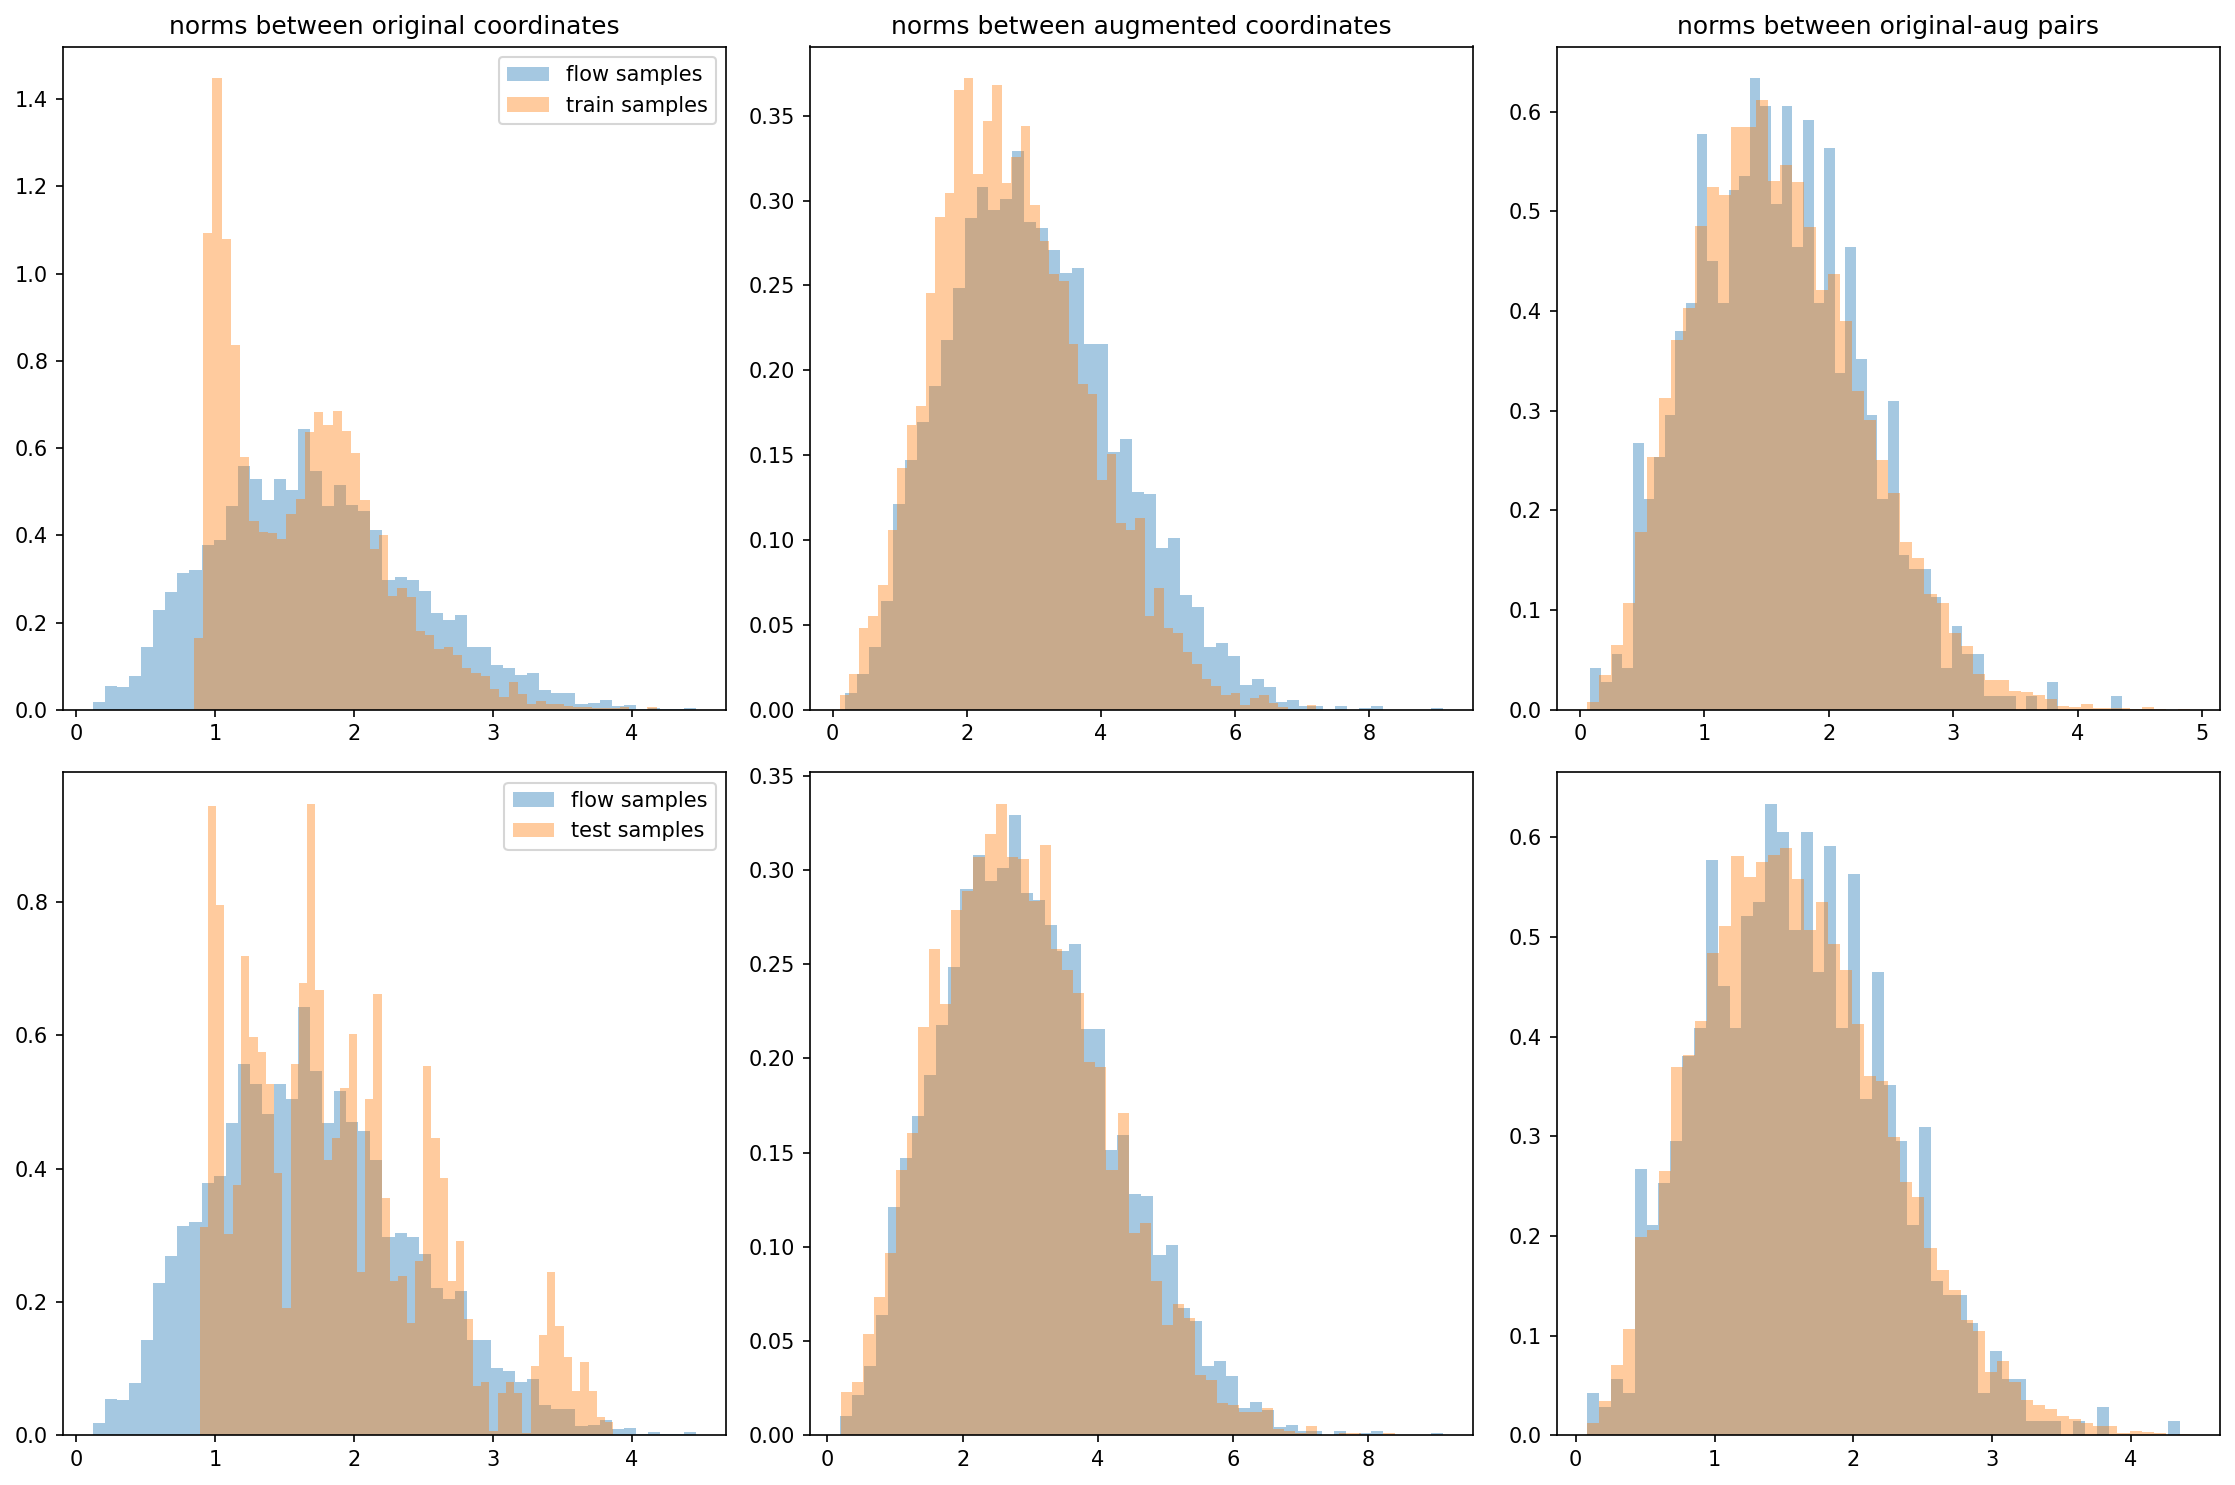

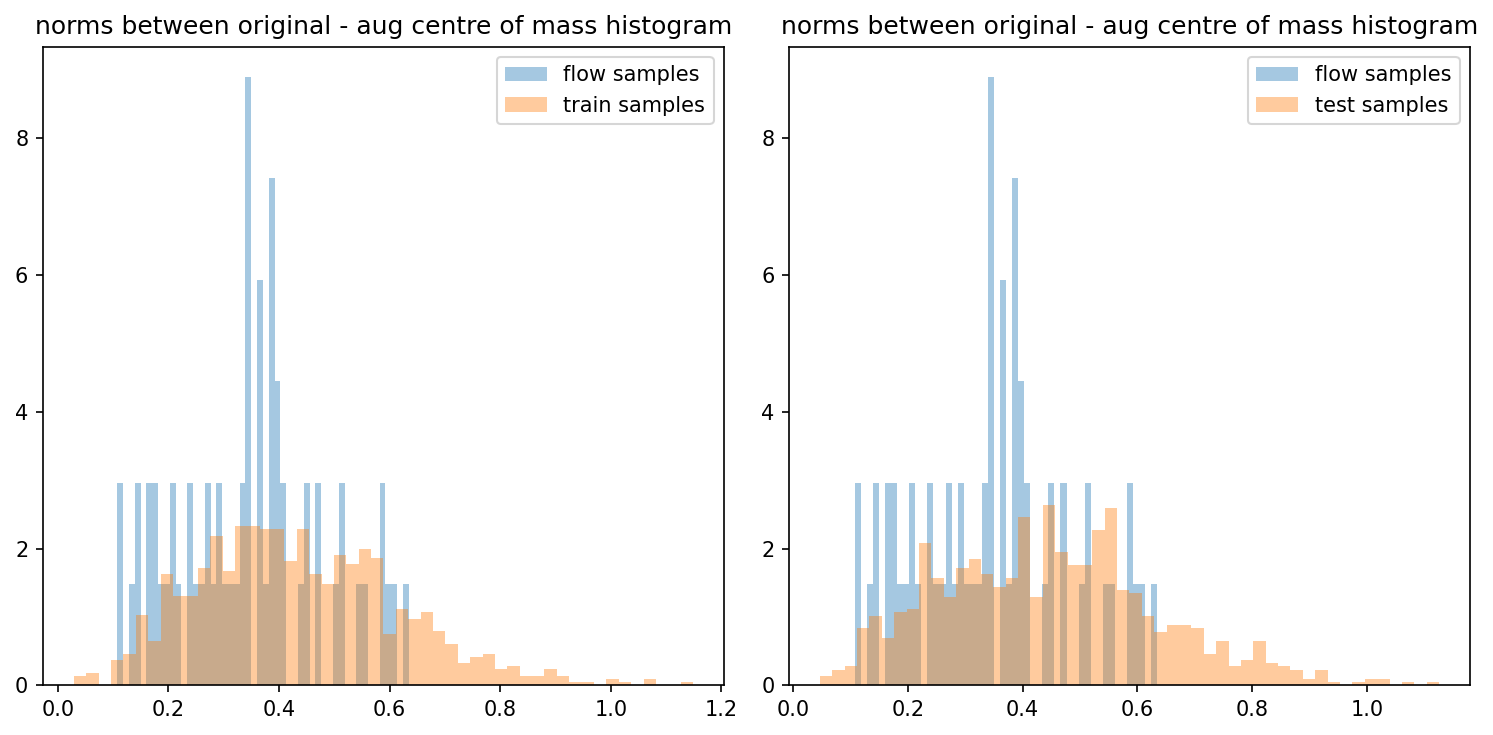

 15%|██████▎                                   | 30/200 [01:31<06:15,  2.21s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 16%|██████▌                                   | 31/200 [01:31<05:07,  1.82s/it]

nan grad
nan grad


 16%|██████▋                                   | 32/200 [01:32<04:19,  1.55s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 16%|██████▉                                   | 33/200 [01:33<03:46,  1.36s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 17%|███████▏                                  | 34/200 [01:34<03:23,  1.22s/it]

nan grad
nan grad
nan grad


 18%|███████▎                                  | 35/200 [01:35<03:06,  1.13s/it]

nan grad
nan grad
nan grad
nan grad


 18%|███████▌                                  | 36/200 [01:36<02:54,  1.06s/it]

nan grad
nan grad
nan grad
nan grad
nan grad


 18%|███████▊                                  | 37/200 [01:37<02:45,  1.02s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 19%|███████▉                                  | 38/200 [01:38<02:39,  1.01it/s]

nan grad
nan grad
nan grad
nan grad


 20%|████████▏                                 | 39/200 [01:39<02:35,  1.04it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 20%|████████▍                                 | 40/200 [01:40<02:31,  1.05it/s]

nan grad
nan grad
nan grad


 20%|████████▌                                 | 41/200 [01:41<02:29,  1.07it/s]

nan grad
nan grad
nan grad


 21%|████████▊                                 | 42/200 [01:41<02:26,  1.08it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 22%|█████████                                 | 43/200 [01:42<02:25,  1.08it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 22%|█████████▏                                | 44/200 [01:43<02:23,  1.09it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 22%|█████████▍                                | 45/200 [01:45<02:43,  1.06s/it]

{'eval_log_lik': Array(nan, dtype=float32), 'eval_marginal_log_lik': Array(nan, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_aug_orig_norm': Array(0.37138003, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5348446, dtype=float32)}


 23%|█████████▋                                | 46/200 [01:46<02:36,  1.02s/it]

nan grad
nan grad
nan grad
nan grad
nan grad


 24%|█████████▊                                | 47/200 [01:46<02:30,  1.02it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 24%|██████████                                | 48/200 [01:47<02:26,  1.04it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 24%|██████████▎                               | 49/200 [01:48<02:24,  1.05it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 25%|██████████▌                               | 50/200 [01:49<02:21,  1.06it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 26%|██████████▋                               | 51/200 [01:50<02:20,  1.06it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 26%|██████████▉                               | 52/200 [01:51<02:18,  1.07it/s]

nan grad
nan grad
nan grad


 26%|███████████▏                              | 53/200 [01:52<02:16,  1.07it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 27%|███████████▎                              | 54/200 [01:53<02:15,  1.08it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 28%|███████████▌                              | 55/200 [01:54<02:13,  1.08it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 28%|███████████▊                              | 56/200 [01:55<02:12,  1.09it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


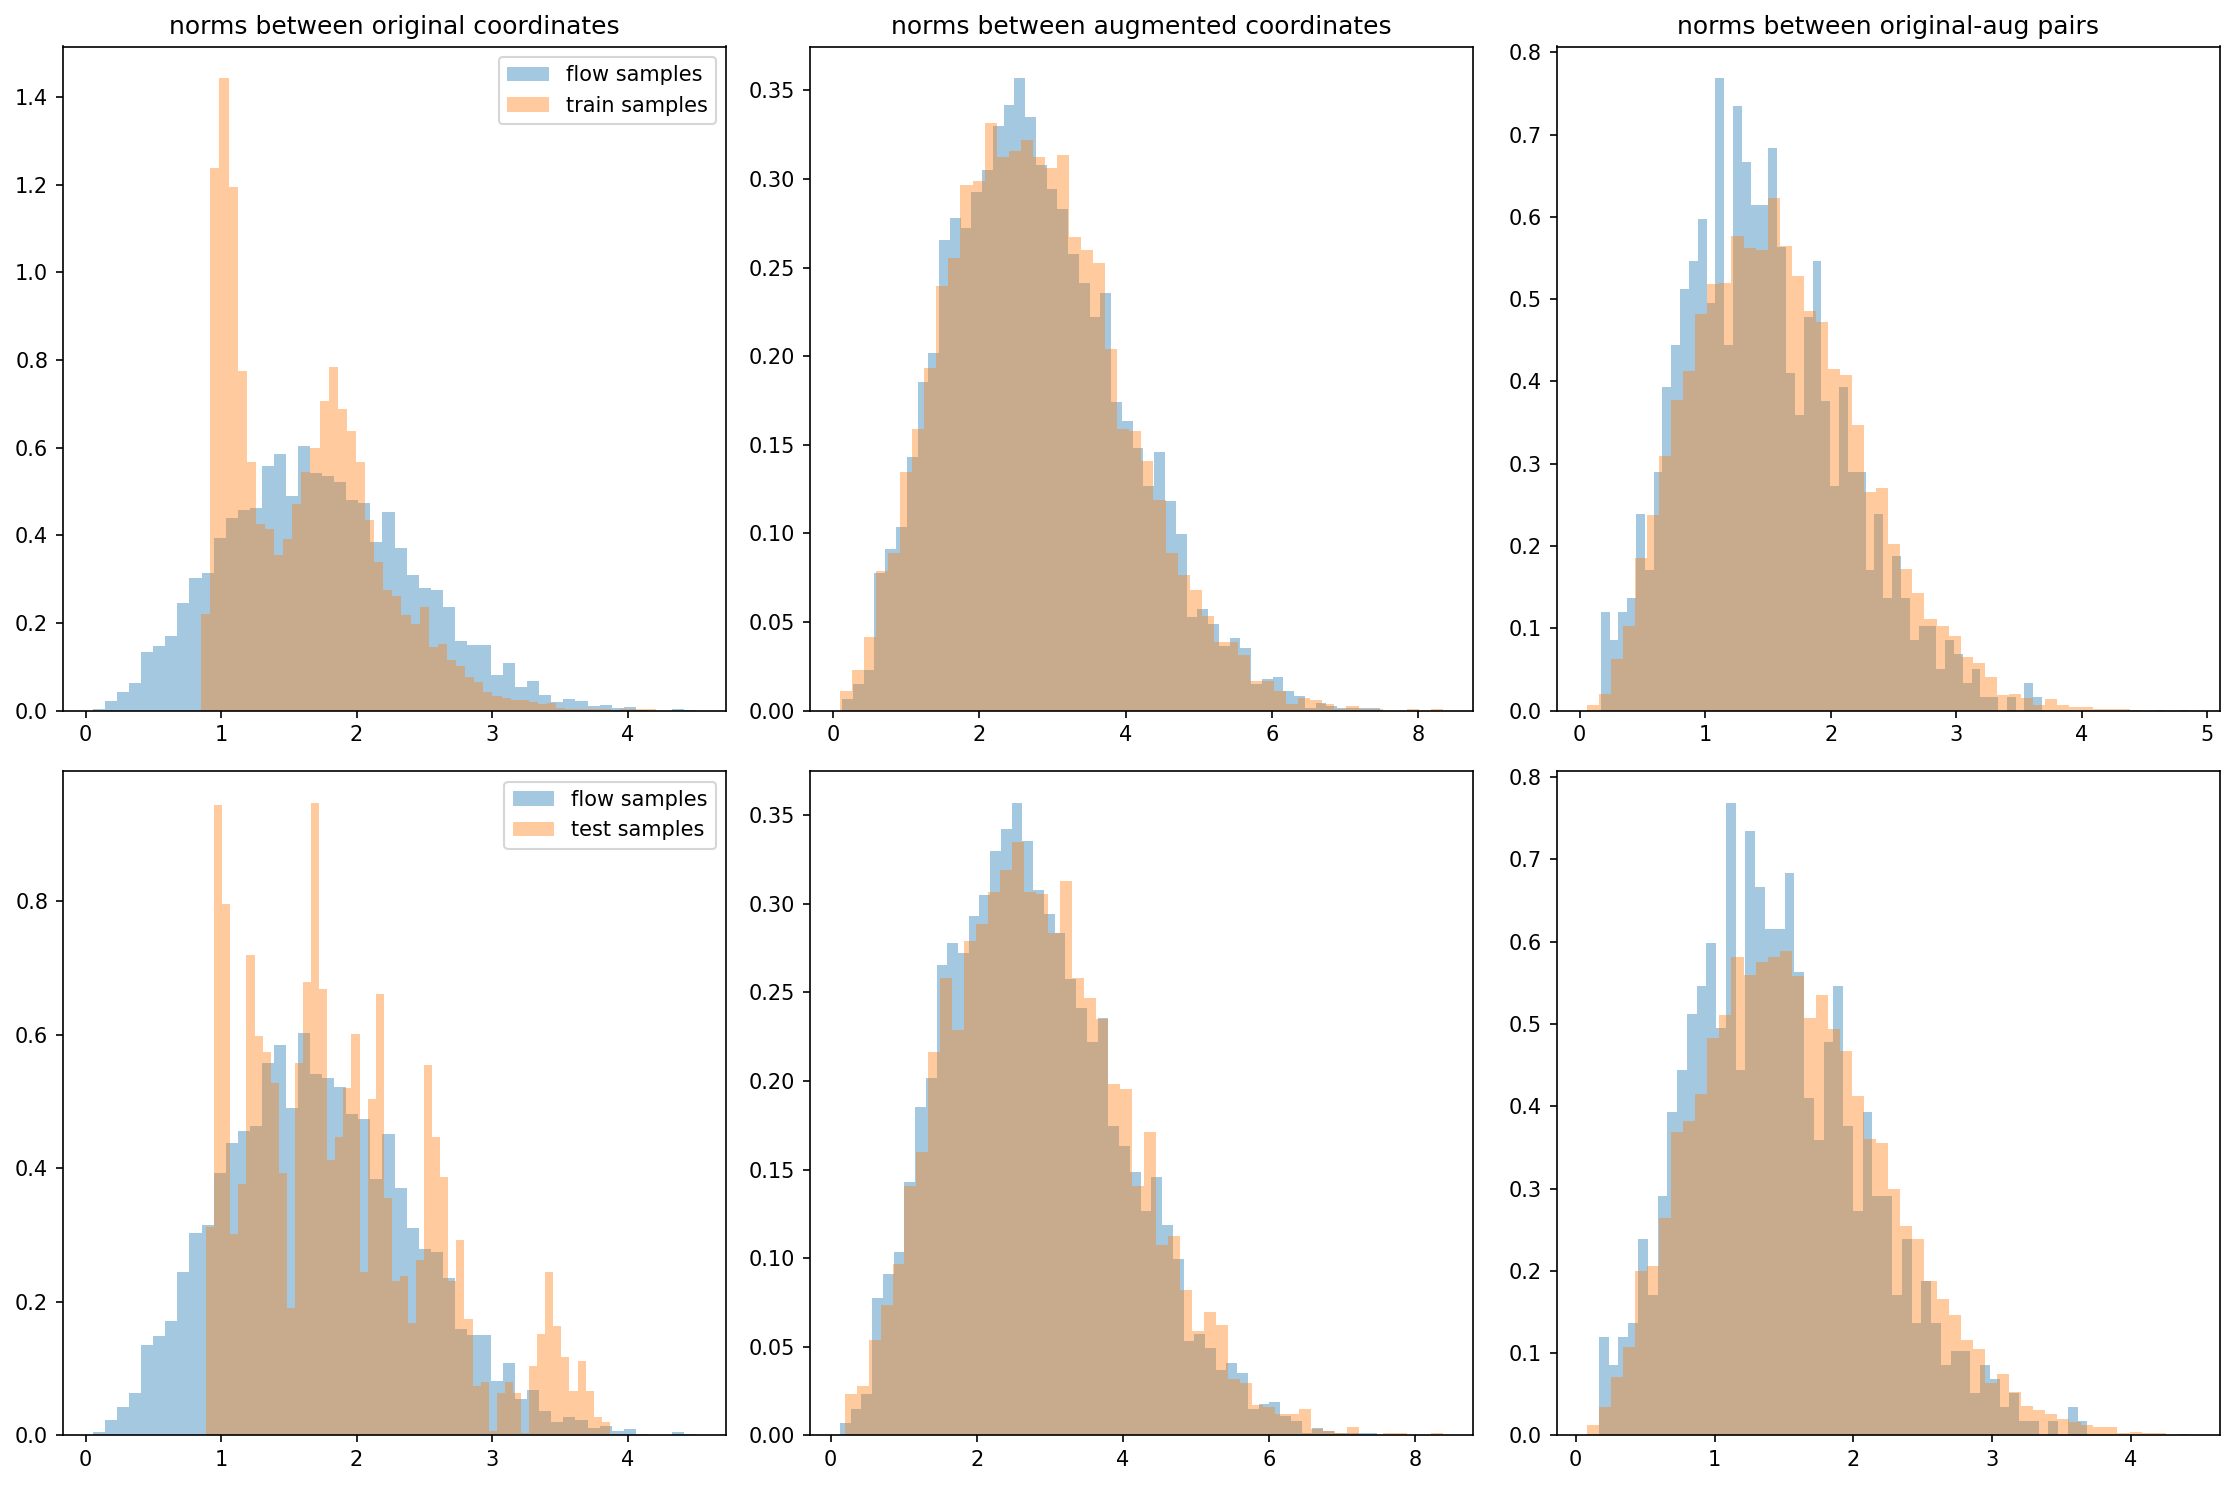

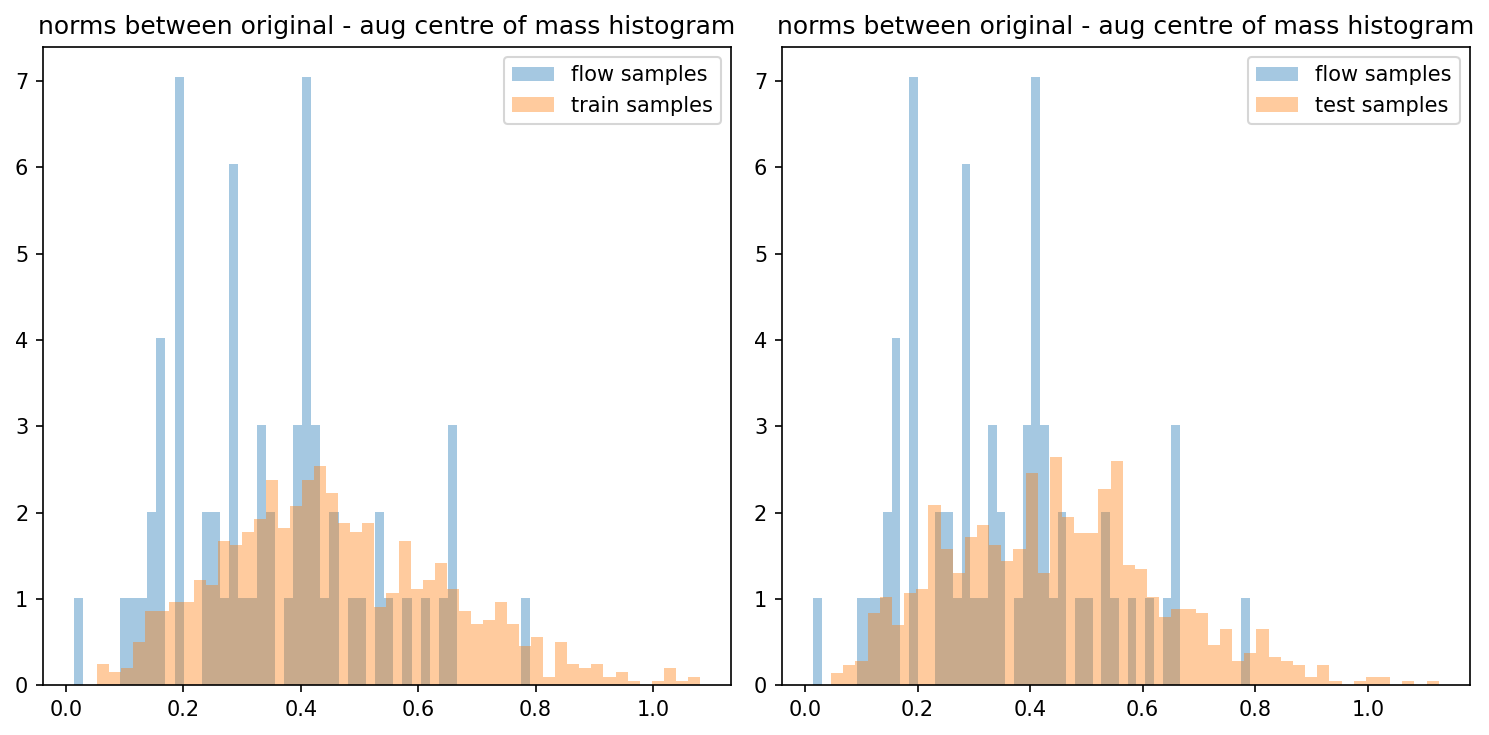

 29%|████████████▏                             | 58/200 [02:03<05:08,  2.17s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 30%|████████████▍                             | 59/200 [02:03<04:13,  1.79s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 30%|████████████▌                             | 60/200 [02:04<03:34,  1.53s/it]

nan grad
nan grad
nan grad


 30%|████████████▊                             | 61/200 [02:05<03:06,  1.35s/it]

nan grad
nan grad
nan grad
nan grad
nan grad


 31%|█████████████                             | 62/200 [02:06<02:48,  1.22s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 32%|█████████████▏                            | 63/200 [02:07<02:34,  1.13s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 32%|█████████████▍                            | 64/200 [02:08<02:24,  1.06s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 32%|█████████████▋                            | 65/200 [02:09<02:18,  1.02s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 33%|█████████████▊                            | 66/200 [02:10<02:12,  1.01it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 34%|██████████████                            | 67/200 [02:11<02:27,  1.11s/it]

{'eval_log_lik': Array(nan, dtype=float32), 'eval_marginal_log_lik': Array(nan, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_aug_orig_norm': Array(0.32454473, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5497597, dtype=float32)}


 34%|██████████████▎                           | 68/200 [02:13<02:33,  1.16s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 34%|██████████████▍                           | 69/200 [02:13<02:22,  1.09s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 35%|██████████████▋                           | 70/200 [02:14<02:14,  1.04s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 36%|██████████████▉                           | 71/200 [02:15<02:08,  1.00it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 36%|███████████████                           | 72/200 [02:16<02:04,  1.02it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 36%|███████████████▎                          | 73/200 [02:17<02:01,  1.04it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 37%|███████████████▌                          | 74/200 [02:18<01:58,  1.06it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 38%|███████████████▊                          | 75/200 [02:19<01:56,  1.07it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 38%|███████████████▉                          | 76/200 [02:20<01:55,  1.07it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 38%|████████████████▏                         | 77/200 [02:21<01:54,  1.08it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 39%|████████████████▍                         | 78/200 [02:22<01:53,  1.08it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 40%|████████████████▌                         | 79/200 [02:23<01:51,  1.08it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 40%|████████████████▊                         | 80/200 [02:24<01:50,  1.09it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 40%|█████████████████                         | 81/200 [02:24<01:49,  1.09it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 41%|█████████████████▏                        | 82/200 [02:25<01:48,  1.09it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 42%|█████████████████▍                        | 83/200 [02:26<01:48,  1.08it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 42%|█████████████████▋                        | 84/200 [02:27<01:46,  1.09it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 42%|█████████████████▊                        | 85/200 [02:28<01:46,  1.08it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


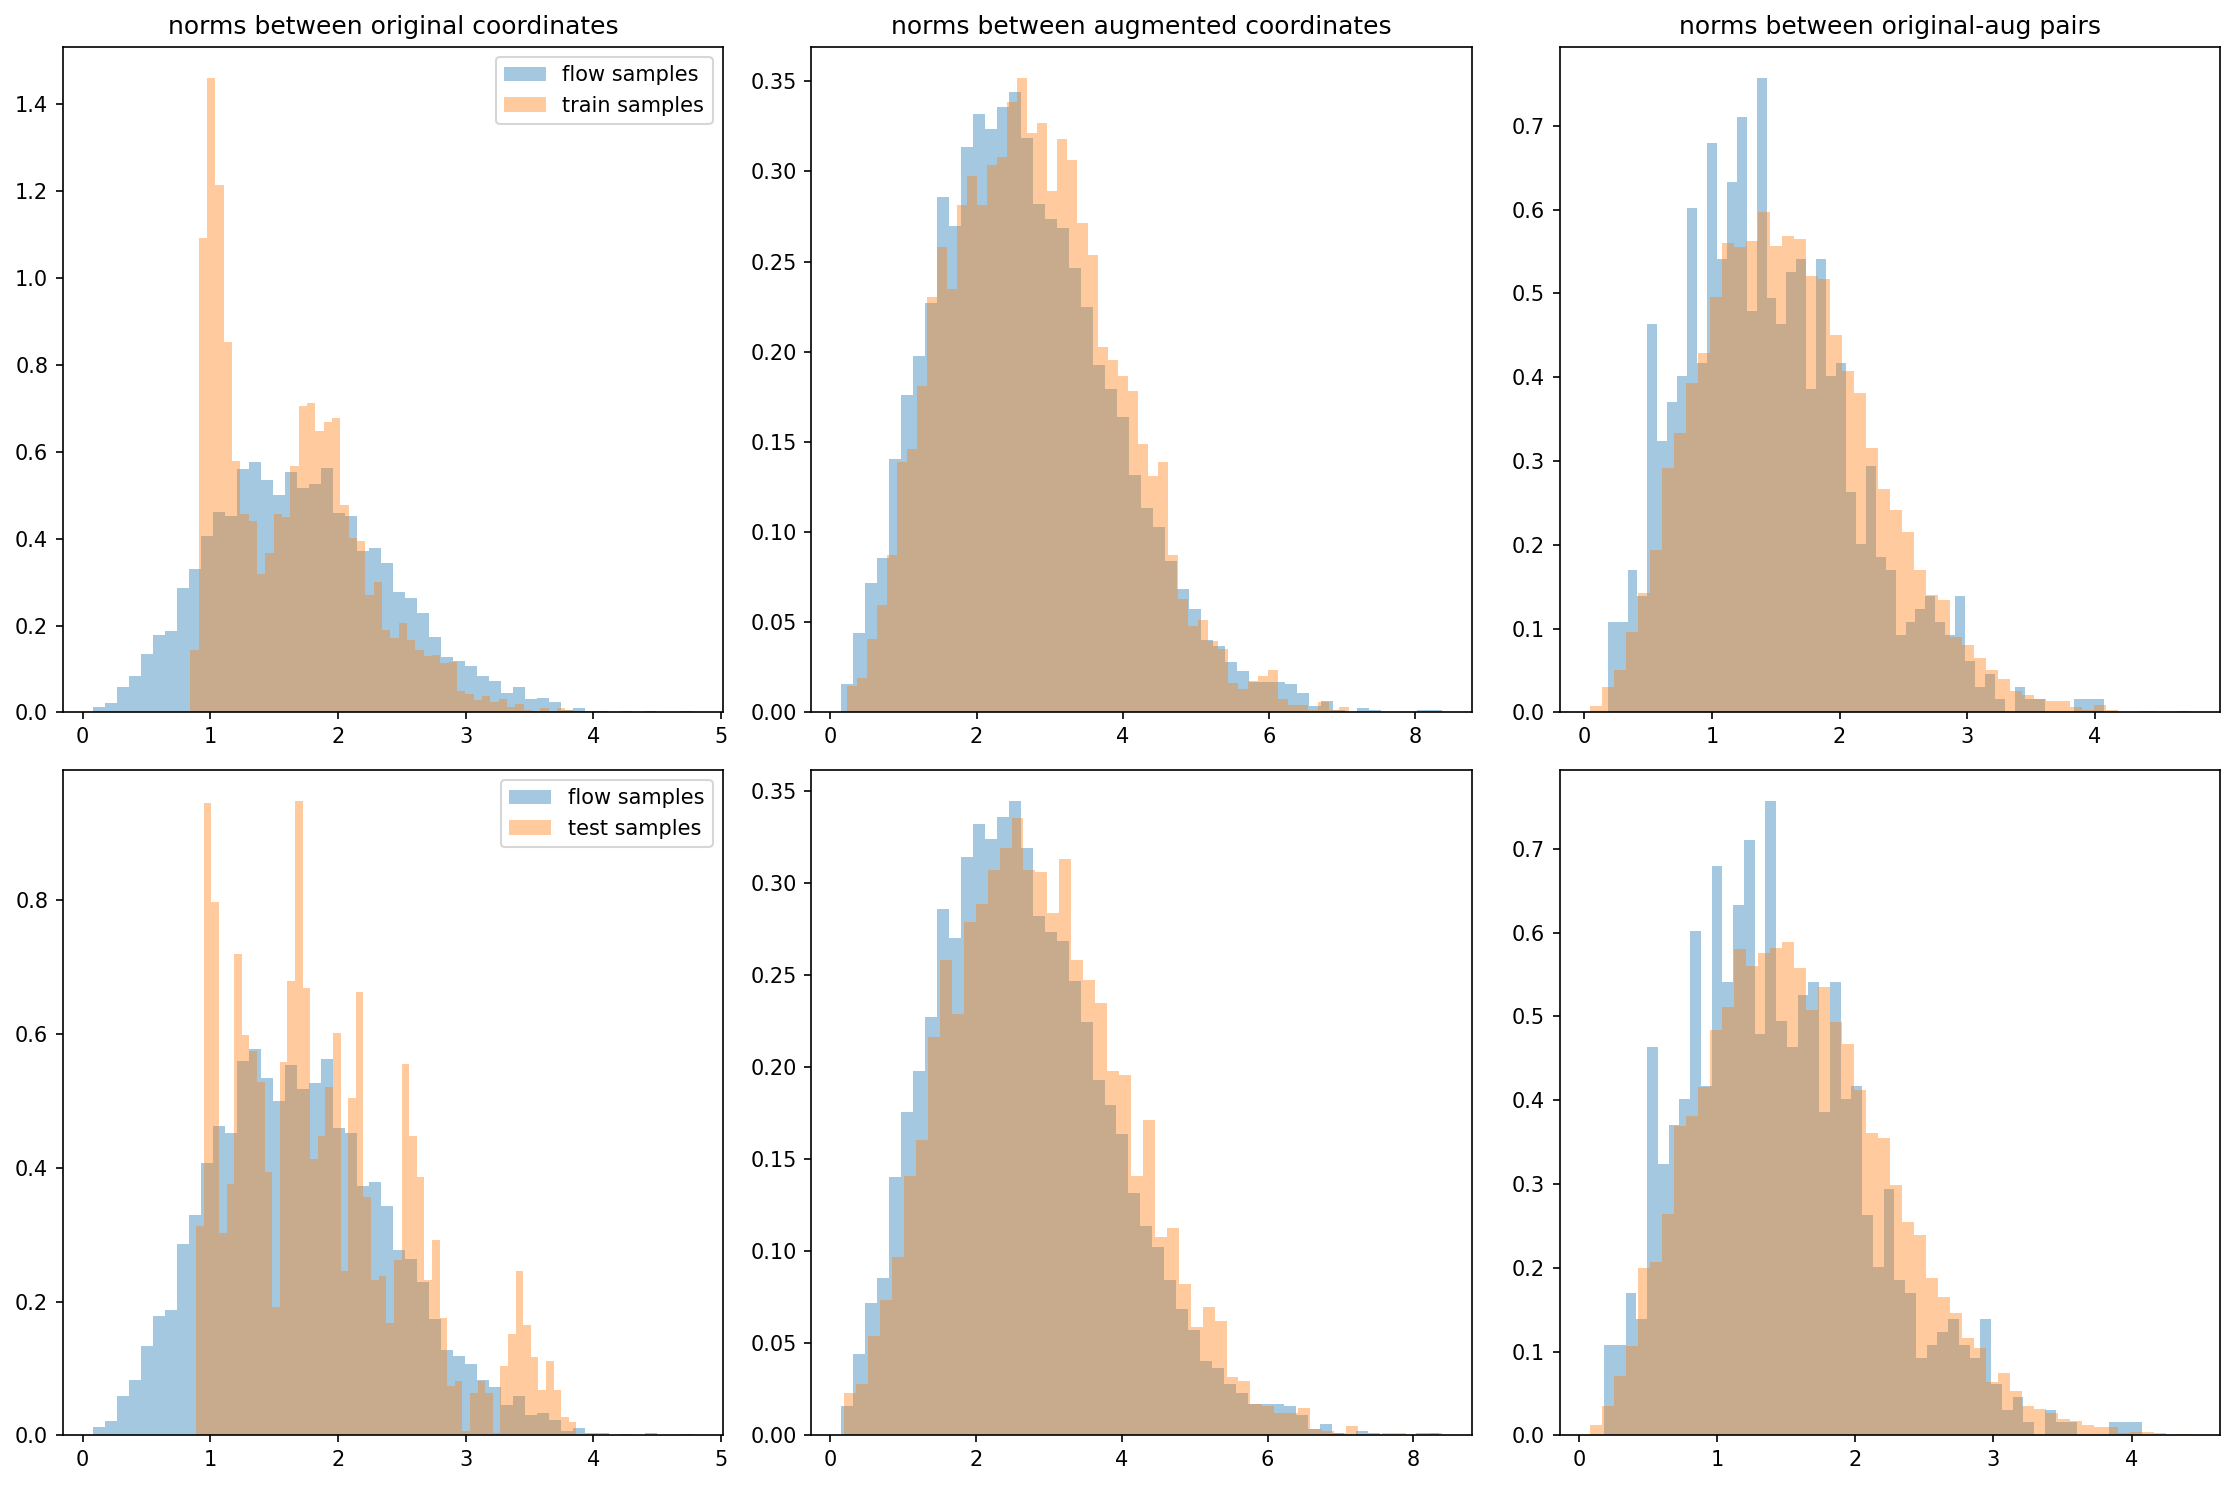

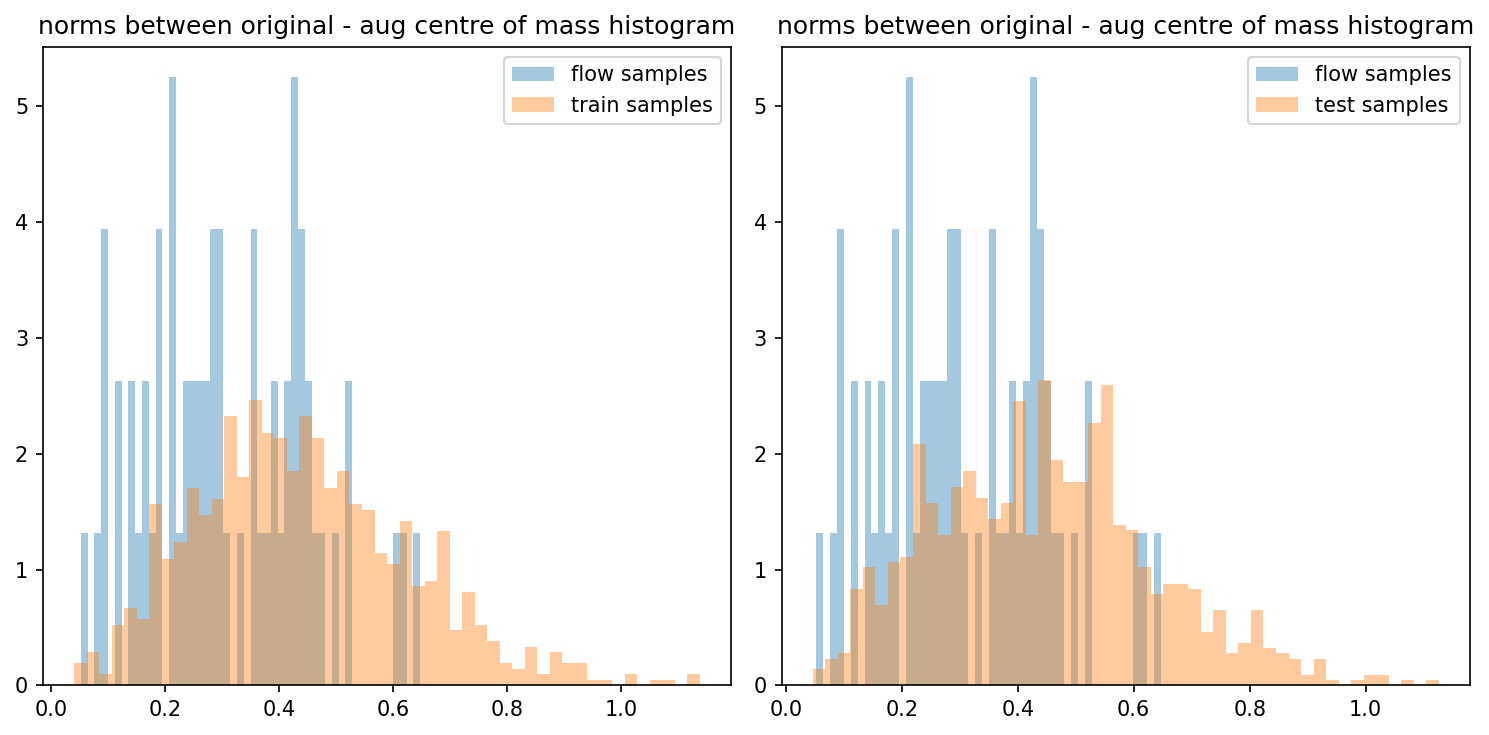

 44%|██████████████████▎                       | 87/200 [02:36<04:05,  2.17s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 44%|██████████████████▍                       | 88/200 [02:37<03:20,  1.79s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 44%|██████████████████▋                       | 89/200 [02:38<03:05,  1.67s/it]

{'eval_log_lik': Array(nan, dtype=float32), 'eval_marginal_log_lik': Array(nan, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_aug_orig_norm': Array(0.2992524, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5202798, dtype=float32)}


 45%|██████████████████▉                       | 90/200 [02:39<02:38,  1.44s/it]

nan grad
nan grad
nan grad
nan grad


 46%|███████████████████                       | 91/200 [02:40<02:19,  1.28s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 46%|███████████████████▎                      | 92/200 [02:41<02:07,  1.18s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 46%|███████████████████▌                      | 93/200 [02:42<01:57,  1.10s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 47%|███████████████████▋                      | 94/200 [02:43<01:50,  1.04s/it]

nan grad
nan grad
nan grad
nan grad


 48%|███████████████████▉                      | 95/200 [02:44<01:45,  1.01s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 48%|████████████████████▏                     | 96/200 [02:45<01:42,  1.02it/s]

nan grad
nan grad
nan grad


 48%|████████████████████▎                     | 97/200 [02:46<01:39,  1.04it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 49%|████████████████████▌                     | 98/200 [02:47<01:37,  1.05it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 50%|████████████████████▊                     | 99/200 [02:47<01:35,  1.06it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 50%|████████████████████▌                    | 100/200 [02:48<01:33,  1.07it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 50%|████████████████████▋                    | 101/200 [02:49<01:32,  1.07it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 51%|████████████████████▉                    | 102/200 [02:50<01:31,  1.08it/s]

nan grad
nan grad
nan grad


 52%|█████████████████████                    | 103/200 [02:51<01:29,  1.08it/s]

nan grad
nan grad
nan grad
nan grad


 52%|█████████████████████▎                   | 104/200 [02:52<01:29,  1.08it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 52%|█████████████████████▌                   | 105/200 [02:53<01:28,  1.08it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 53%|█████████████████████▋                   | 106/200 [02:54<01:27,  1.08it/s]

nan grad
nan grad
nan grad
nan grad


 54%|█████████████████████▉                   | 107/200 [02:55<01:26,  1.08it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 54%|██████████████████████▏                  | 108/200 [02:56<01:25,  1.08it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 55%|██████████████████████▎                  | 109/200 [02:57<01:24,  1.08it/s]

nan grad
nan grad
nan grad
nan grad


 55%|██████████████████████▌                  | 110/200 [02:58<01:23,  1.08it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 56%|██████████████████████▊                  | 111/200 [02:59<01:35,  1.07s/it]

{'eval_log_lik': Array(nan, dtype=float32), 'eval_marginal_log_lik': Array(nan, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_aug_orig_norm': Array(0.3023394, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5301856, dtype=float32)}


 56%|██████████████████████▉                  | 112/200 [03:00<01:30,  1.03s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 56%|███████████████████████▏                 | 113/200 [03:01<01:27,  1.00s/it]

nan grad
nan grad
nan grad
nan grad


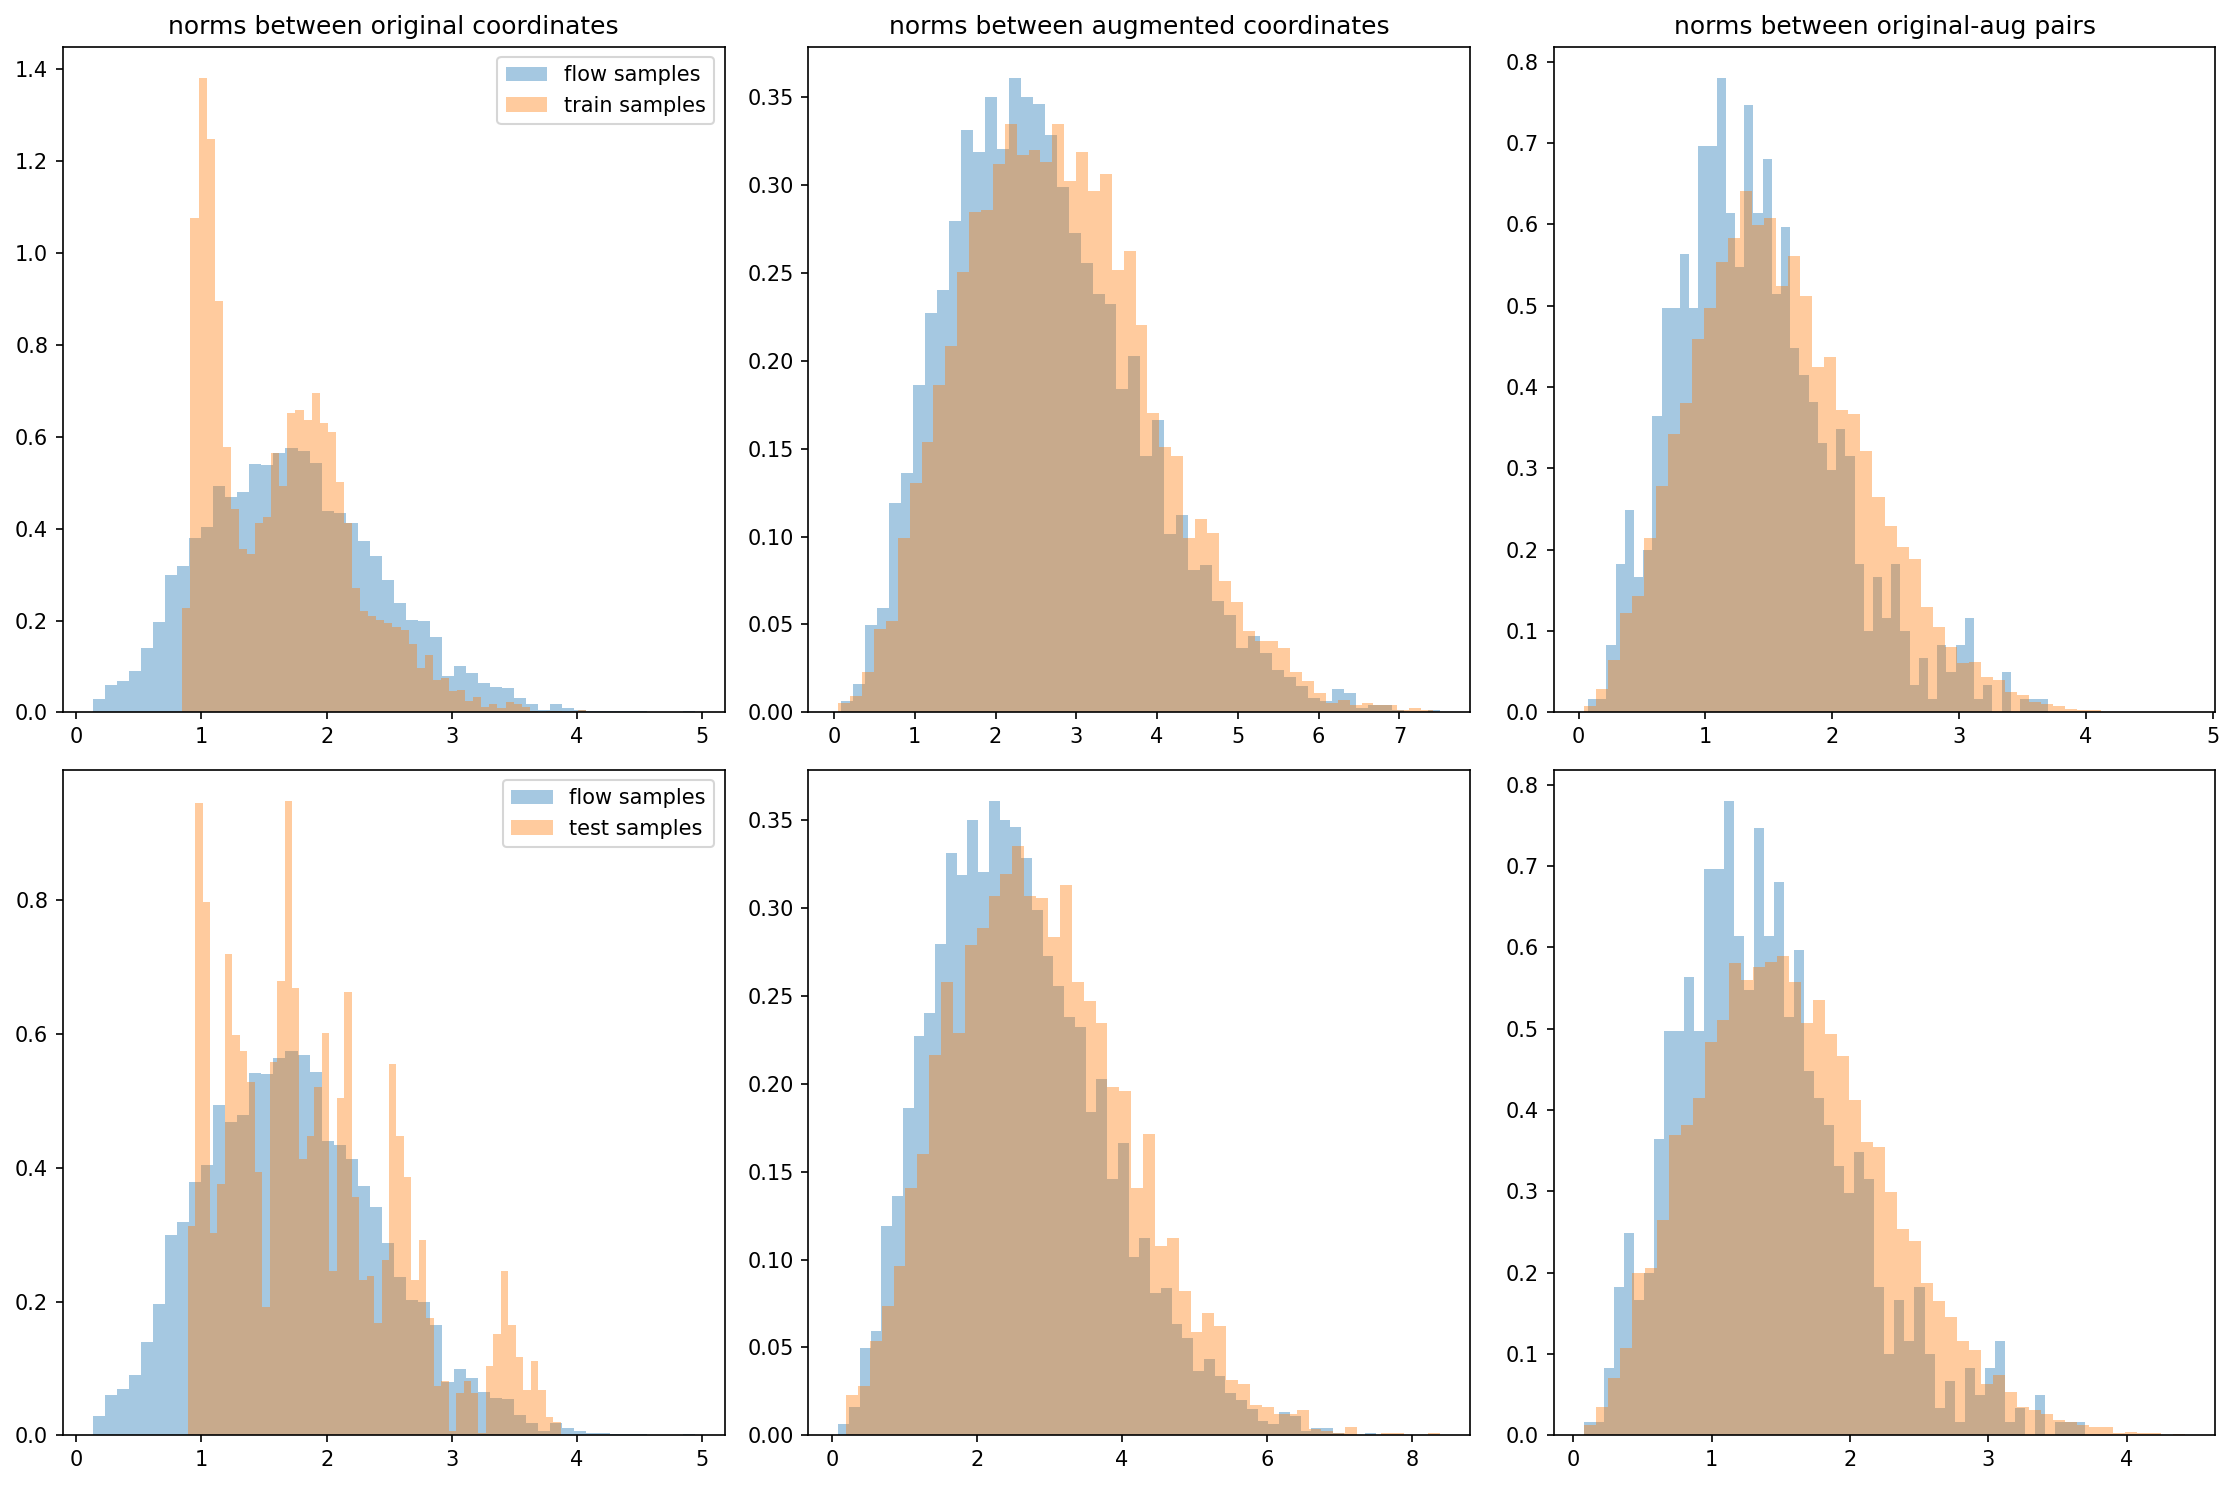

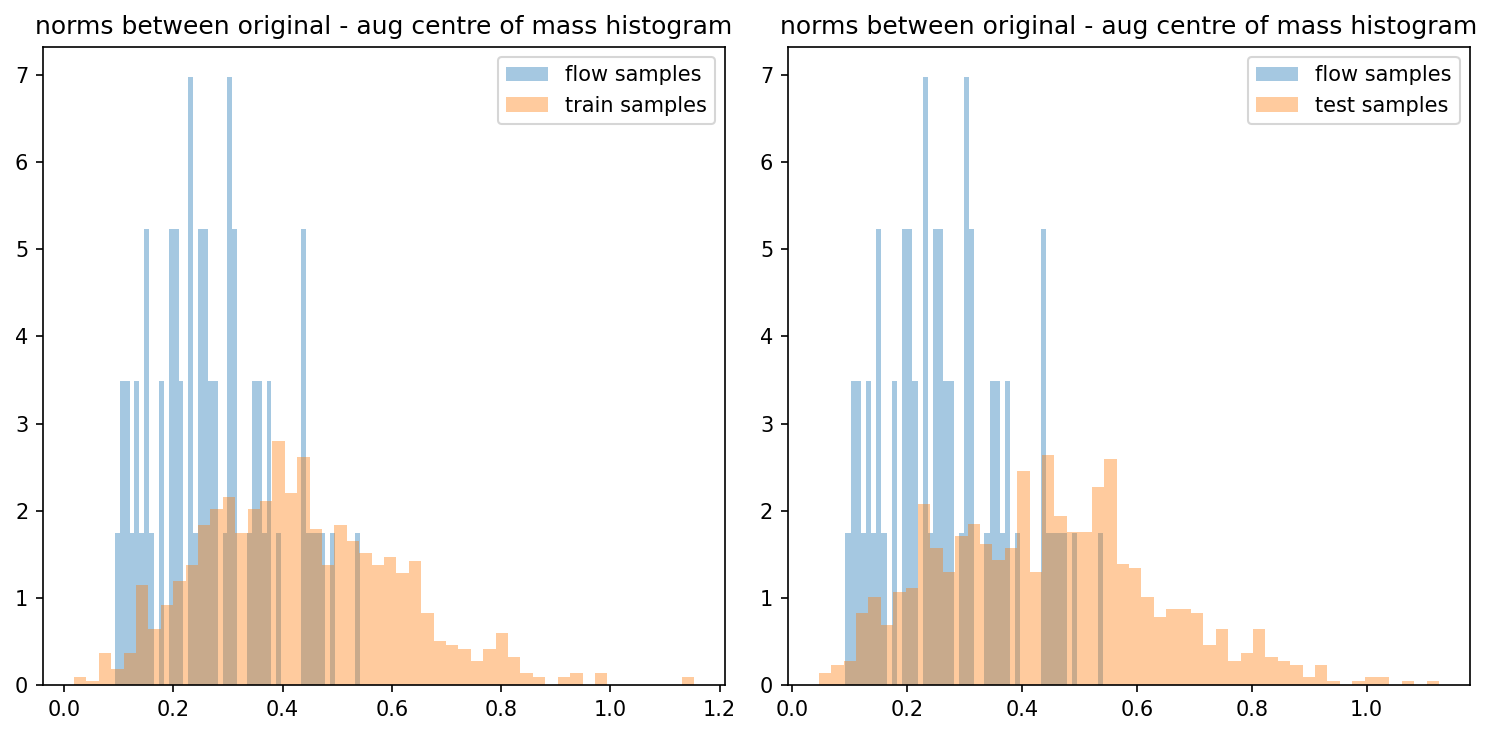

 57%|███████████████████████▌                 | 115/200 [03:09<03:08,  2.22s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 58%|███████████████████████▊                 | 116/200 [03:10<02:33,  1.83s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 58%|███████████████████████▉                 | 117/200 [03:11<02:09,  1.56s/it]

nan grad
nan grad
nan grad
nan grad
nan grad


 59%|████████████████████████▏                | 118/200 [03:11<01:52,  1.37s/it]

nan grad
nan grad
nan grad
nan grad
nan grad


 60%|████████████████████████▍                | 119/200 [03:12<01:40,  1.24s/it]

nan grad
nan grad
nan grad
nan grad


 60%|████████████████████████▌                | 120/200 [03:13<01:31,  1.14s/it]

nan grad
nan grad
nan grad
nan grad


 60%|████████████████████████▊                | 121/200 [03:14<01:24,  1.07s/it]

nan grad
nan grad
nan grad
nan grad


 61%|█████████████████████████                | 122/200 [03:15<01:20,  1.03s/it]

nan grad
nan grad
nan grad
nan grad
nan grad


 62%|█████████████████████████▏               | 123/200 [03:16<01:16,  1.00it/s]

nan grad
nan grad
nan grad


 62%|█████████████████████████▍               | 124/200 [03:17<01:14,  1.02it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 62%|█████████████████████████▋               | 125/200 [03:18<01:12,  1.04it/s]

nan grad
nan grad


 63%|█████████████████████████▊               | 126/200 [03:19<01:10,  1.05it/s]

nan grad
nan grad
nan grad


 64%|██████████████████████████               | 127/200 [03:20<01:08,  1.06it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 64%|██████████████████████████▏              | 128/200 [03:21<01:07,  1.07it/s]

nan grad
nan grad
nan grad


 64%|██████████████████████████▍              | 129/200 [03:22<01:06,  1.07it/s]

nan grad
nan grad


 65%|██████████████████████████▋              | 130/200 [03:23<01:05,  1.07it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 66%|██████████████████████████▊              | 131/200 [03:24<01:04,  1.07it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 66%|███████████████████████████              | 132/200 [03:24<01:03,  1.07it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 66%|███████████████████████████▎             | 133/200 [03:26<01:12,  1.08s/it]

{'eval_log_lik': Array(nan, dtype=float32), 'eval_marginal_log_lik': Array(nan, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_aug_orig_norm': Array(0.32337242, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5478348, dtype=float32)}


 67%|███████████████████████████▍             | 134/200 [03:27<01:08,  1.05s/it]

nan grad
nan grad
nan grad
nan grad


 68%|███████████████████████████▋             | 135/200 [03:28<01:05,  1.01s/it]

nan grad
nan grad


 68%|███████████████████████████▉             | 136/200 [03:29<01:03,  1.01it/s]

nan grad
nan grad
nan grad


 68%|████████████████████████████             | 137/200 [03:30<01:01,  1.02it/s]

nan grad
nan grad
nan grad


 69%|████████████████████████████▎            | 138/200 [03:31<01:06,  1.07s/it]

nan grad
nan grad
nan grad


 70%|████████████████████████████▍            | 139/200 [03:32<01:03,  1.03s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 70%|████████████████████████████▋            | 140/200 [03:33<01:00,  1.01s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 70%|████████████████████████████▉            | 141/200 [03:34<00:58,  1.01it/s]

nan grad
nan grad
nan grad


 71%|█████████████████████████████            | 142/200 [03:35<00:56,  1.03it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


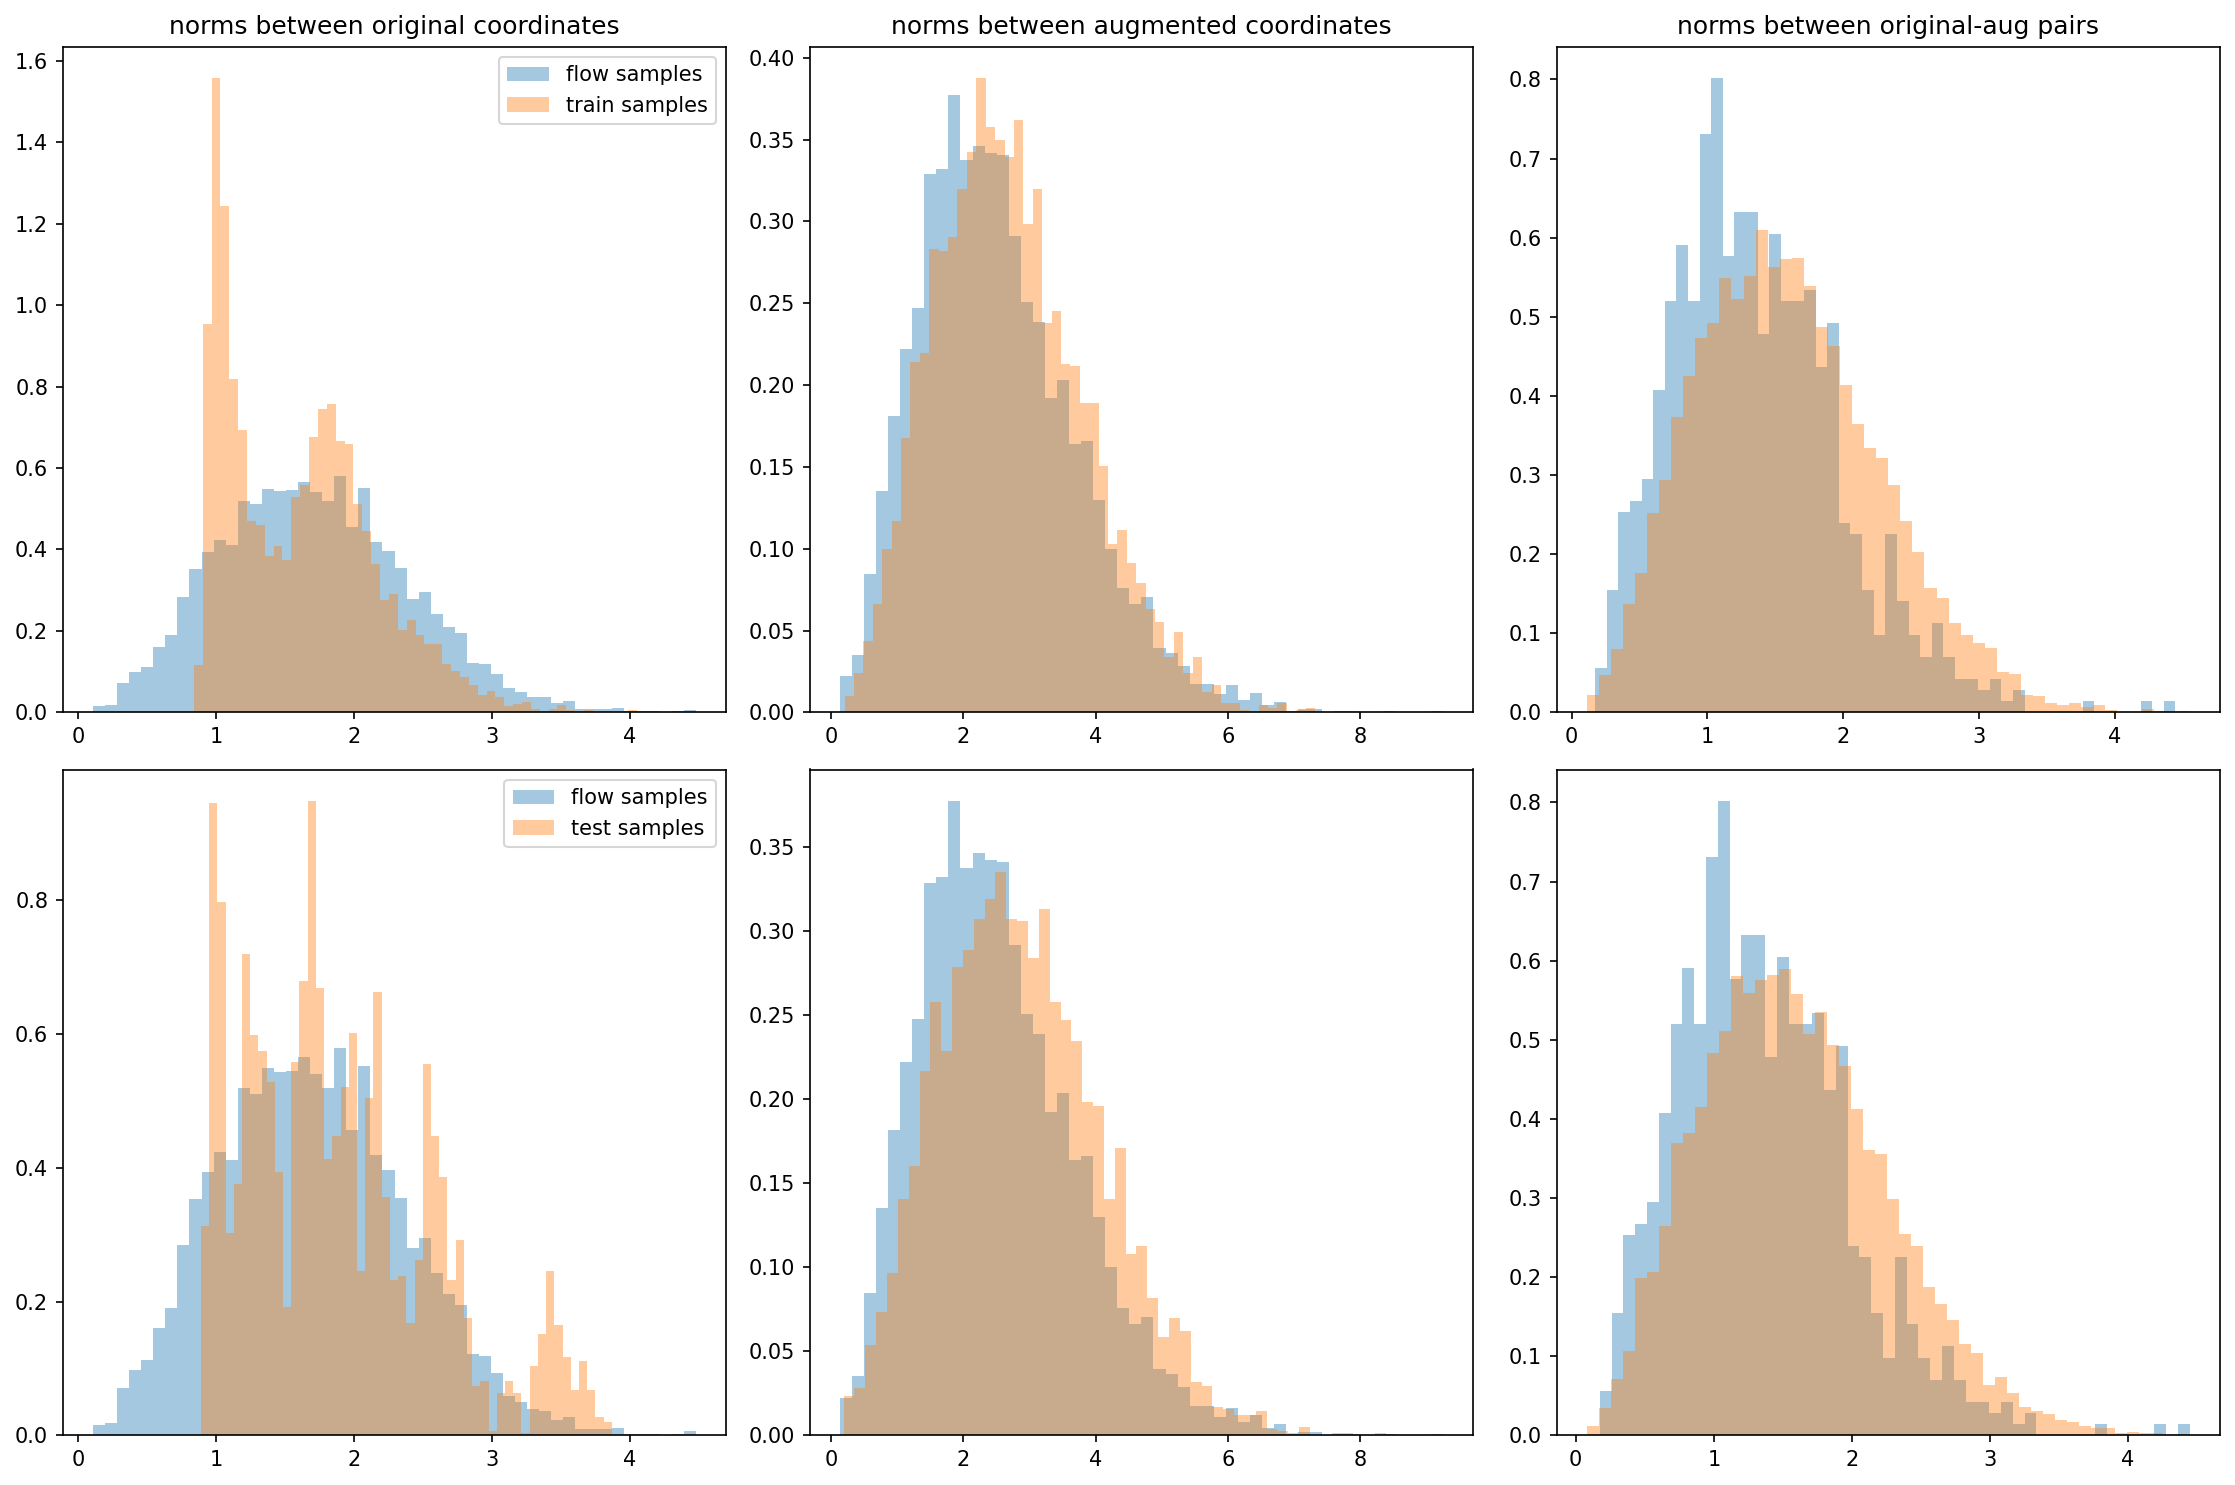

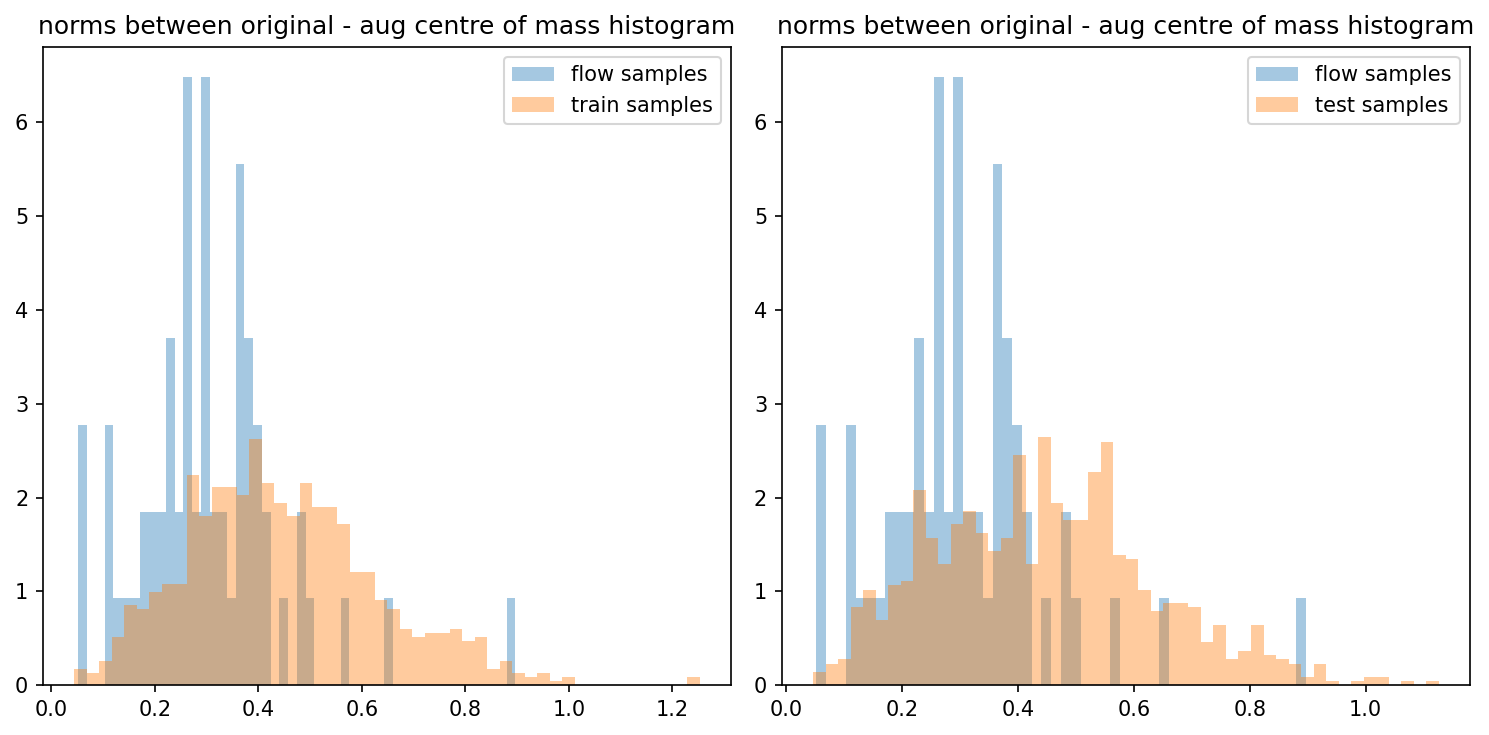

 72%|█████████████████████████████▌           | 144/200 [03:43<02:03,  2.20s/it]

nan grad
nan grad
nan grad
nan grad
nan grad


 72%|█████████████████████████████▋           | 145/200 [03:43<01:39,  1.82s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 73%|█████████████████████████████▉           | 146/200 [03:44<01:23,  1.55s/it]

nan grad
nan grad
nan grad
nan grad


 74%|██████████████████████████████▏          | 147/200 [03:45<01:11,  1.36s/it]

nan grad
nan grad
nan grad


 74%|██████████████████████████████▎          | 148/200 [03:46<01:03,  1.22s/it]

nan grad


 74%|██████████████████████████████▌          | 149/200 [03:47<00:58,  1.14s/it]

nan grad
nan grad
nan grad
nan grad


 75%|██████████████████████████████▊          | 150/200 [03:48<00:53,  1.08s/it]

nan grad
nan grad
nan grad


 76%|██████████████████████████████▉          | 151/200 [03:49<00:50,  1.03s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 76%|███████████████████████████████▏         | 152/200 [03:50<00:47,  1.00it/s]

nan grad
nan grad
nan grad
nan grad


 76%|███████████████████████████████▎         | 153/200 [03:51<00:45,  1.03it/s]

nan grad
nan grad
nan grad
nan grad


 77%|███████████████████████████████▌         | 154/200 [03:52<00:44,  1.04it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 78%|███████████████████████████████▊         | 155/200 [03:53<00:48,  1.09s/it]

{'eval_log_lik': Array(nan, dtype=float32), 'eval_marginal_log_lik': Array(nan, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_aug_orig_norm': Array(0.3441021, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5383878, dtype=float32)}


 78%|███████████████████████████████▉         | 156/200 [03:54<00:45,  1.04s/it]

nan grad
nan grad
nan grad


 78%|████████████████████████████████▏        | 157/200 [03:55<00:43,  1.01s/it]

nan grad
nan grad
nan grad
nan grad
nan grad


 79%|████████████████████████████████▍        | 158/200 [03:56<00:41,  1.02it/s]

nan grad
nan grad
nan grad
nan grad


 80%|████████████████████████████████▌        | 159/200 [03:57<00:39,  1.03it/s]

nan grad
nan grad
nan grad
nan grad


 80%|████████████████████████████████▊        | 160/200 [03:58<00:38,  1.04it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 80%|█████████████████████████████████        | 161/200 [03:59<00:37,  1.05it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 81%|█████████████████████████████████▏       | 162/200 [04:00<00:36,  1.05it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 82%|█████████████████████████████████▍       | 163/200 [04:01<00:35,  1.05it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 82%|█████████████████████████████████▌       | 164/200 [04:02<00:34,  1.05it/s]

nan grad
nan grad
nan grad


 82%|█████████████████████████████████▊       | 165/200 [04:03<00:33,  1.06it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 83%|██████████████████████████████████       | 166/200 [04:03<00:32,  1.06it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 84%|██████████████████████████████████▏      | 167/200 [04:04<00:31,  1.06it/s]

nan grad
nan grad
nan grad
nan grad


 84%|██████████████████████████████████▍      | 168/200 [04:05<00:30,  1.06it/s]

nan grad
nan grad
nan grad


 84%|██████████████████████████████████▋      | 169/200 [04:06<00:29,  1.06it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 85%|██████████████████████████████████▊      | 170/200 [04:07<00:28,  1.06it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


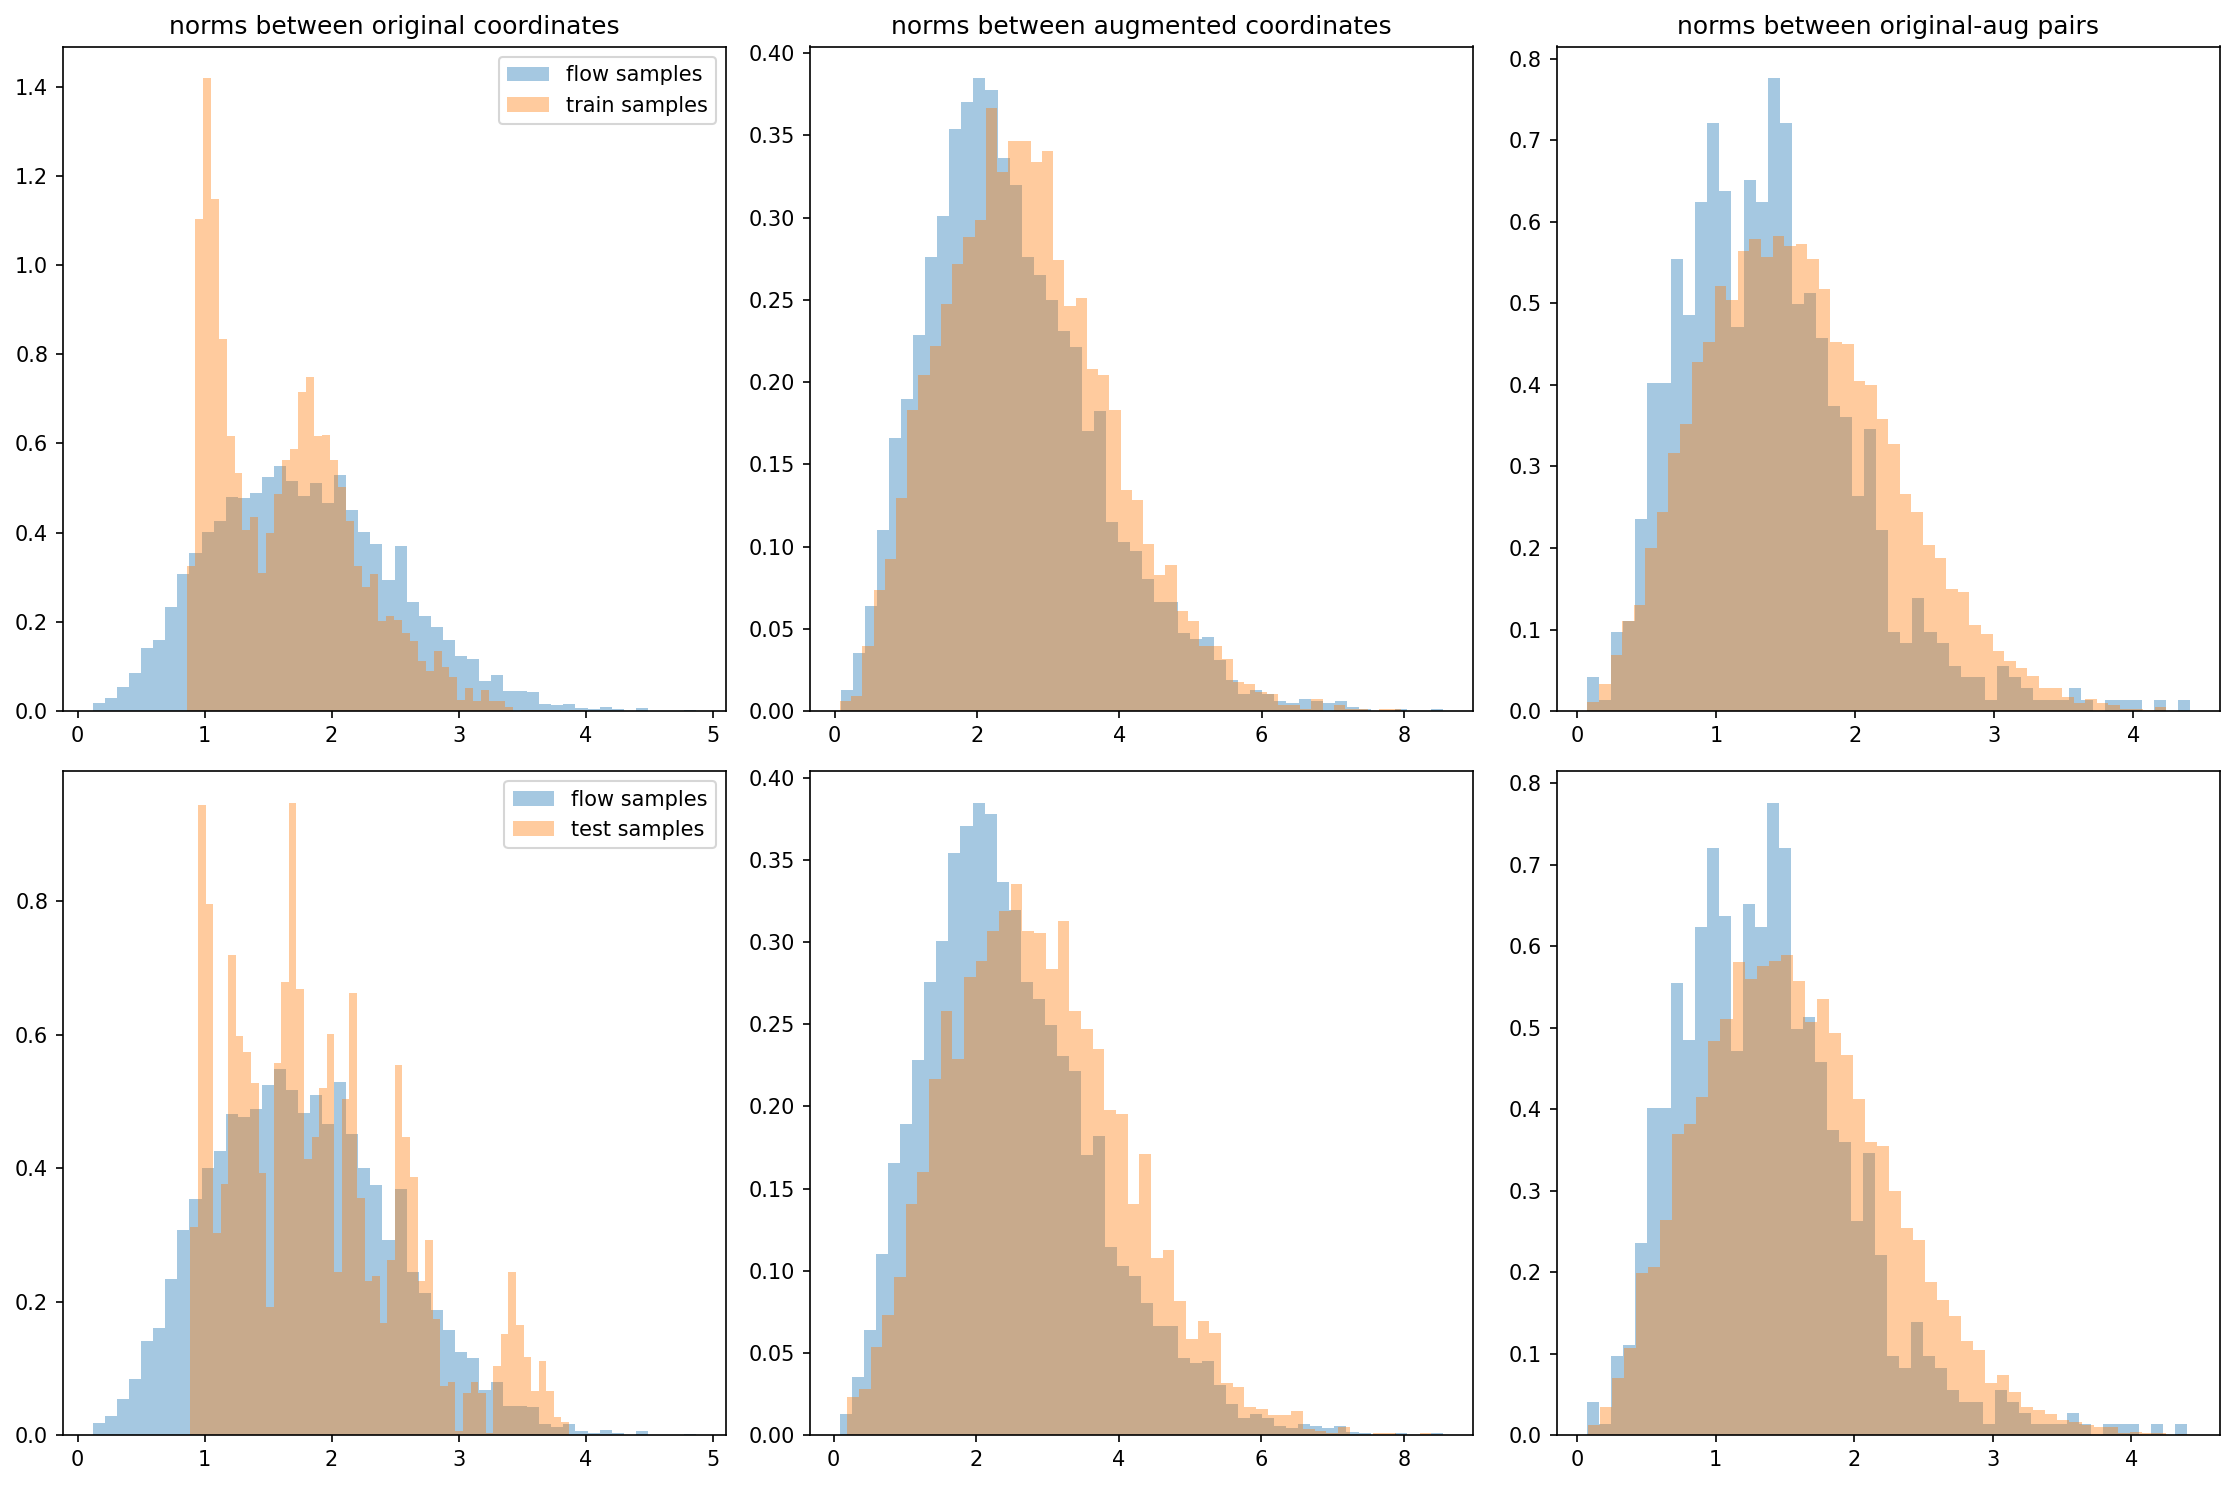

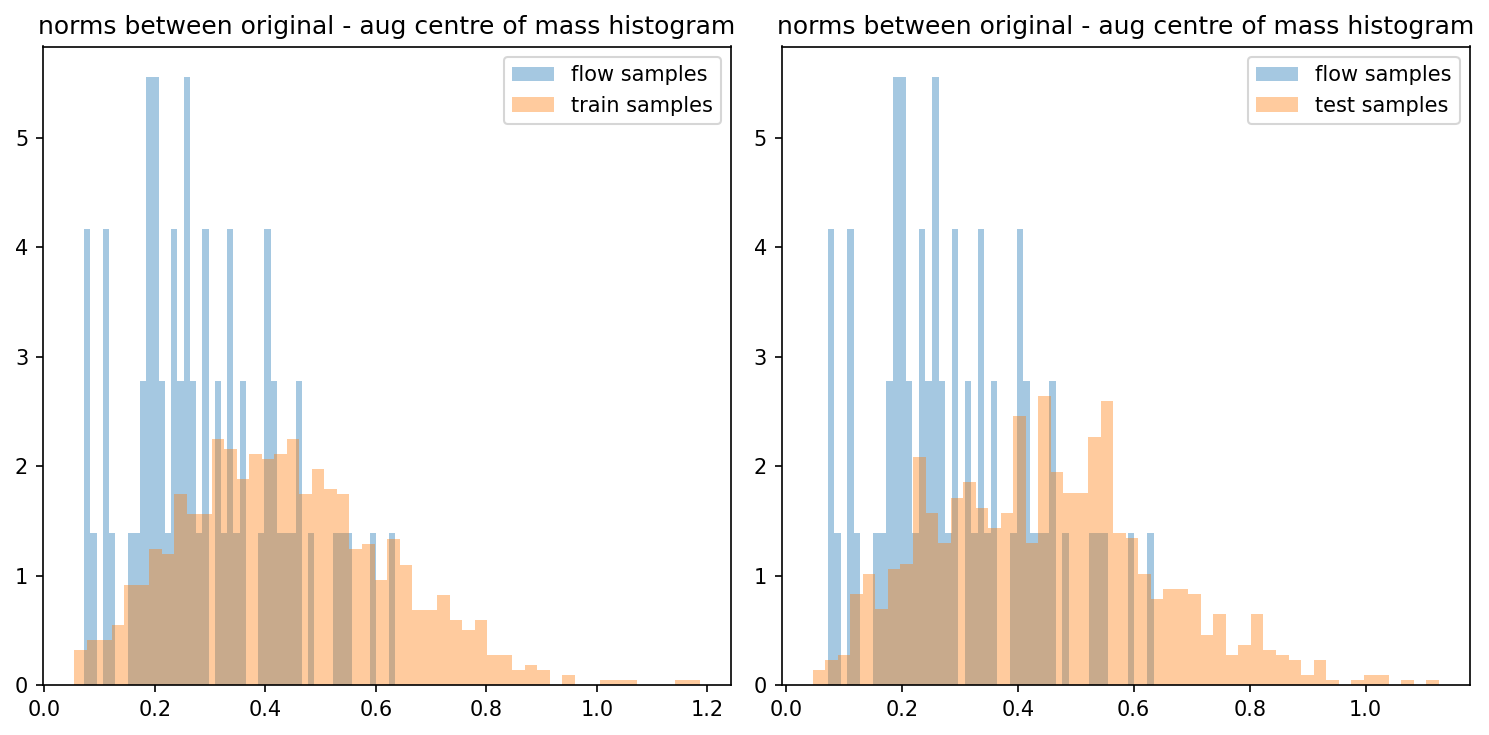

 86%|███████████████████████████████████▎     | 172/200 [04:15<01:01,  2.20s/it]

nan grad


 86%|███████████████████████████████████▍     | 173/200 [04:16<00:49,  1.82s/it]

nan grad
nan grad
nan grad
nan grad


 87%|███████████████████████████████████▋     | 174/200 [04:17<00:40,  1.55s/it]

nan grad


 88%|███████████████████████████████████▉     | 175/200 [04:18<00:33,  1.36s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 88%|████████████████████████████████████     | 176/200 [04:19<00:29,  1.22s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 88%|████████████████████████████████████▎    | 177/200 [04:20<00:29,  1.27s/it]

{'eval_log_lik': Array(-96.836, dtype=float32), 'eval_marginal_log_lik': Array(-35.160503, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_aug_orig_norm': Array(0.32214525, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5446259, dtype=float32)}


 89%|████████████████████████████████████▍    | 178/200 [04:21<00:25,  1.17s/it]

nan grad


 90%|████████████████████████████████████▋    | 179/200 [04:22<00:22,  1.09s/it]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 90%|████████████████████████████████████▉    | 180/200 [04:23<00:20,  1.04s/it]

nan grad
nan grad
nan grad
nan grad
nan grad


 90%|█████████████████████████████████████    | 181/200 [04:24<00:19,  1.00s/it]

nan grad
nan grad


 91%|█████████████████████████████████████▎   | 182/200 [04:25<00:17,  1.02it/s]

nan grad
nan grad
nan grad
nan grad


 92%|█████████████████████████████████████▋   | 184/200 [04:27<00:15,  1.04it/s]

nan grad
nan grad
nan grad


 92%|█████████████████████████████████████▉   | 185/200 [04:28<00:14,  1.05it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 93%|██████████████████████████████████████▏  | 186/200 [04:29<00:13,  1.05it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 94%|██████████████████████████████████████▎  | 187/200 [04:29<00:12,  1.05it/s]

nan grad
nan grad


 94%|██████████████████████████████████████▌  | 188/200 [04:30<00:11,  1.06it/s]

nan grad
nan grad


 94%|██████████████████████████████████████▋  | 189/200 [04:31<00:10,  1.06it/s]

nan grad
nan grad
nan grad


 95%|██████████████████████████████████████▉  | 190/200 [04:32<00:09,  1.06it/s]

nan grad
nan grad
nan grad
nan grad
nan grad


 96%|███████████████████████████████████████▏ | 191/200 [04:33<00:08,  1.06it/s]

nan grad
nan grad
nan grad


 96%|███████████████████████████████████████▎ | 192/200 [04:34<00:07,  1.06it/s]

nan grad
nan grad
nan grad


 96%|███████████████████████████████████████▌ | 193/200 [04:35<00:06,  1.06it/s]

nan grad
nan grad


 97%|███████████████████████████████████████▊ | 194/200 [04:36<00:05,  1.06it/s]

nan grad
nan grad
nan grad


 98%|███████████████████████████████████████▉ | 195/200 [04:37<00:04,  1.05it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 98%|████████████████████████████████████████▏| 196/200 [04:38<00:03,  1.05it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


 98%|████████████████████████████████████████▍| 197/200 [04:39<00:02,  1.05it/s]

nan grad


 99%|████████████████████████████████████████▌| 198/200 [04:40<00:01,  1.05it/s]

nan grad
nan grad
nan grad
nan grad


100%|████████████████████████████████████████▊| 199/200 [04:41<00:00,  1.05it/s]

nan grad
nan grad
nan grad
nan grad
nan grad
nan grad
nan grad


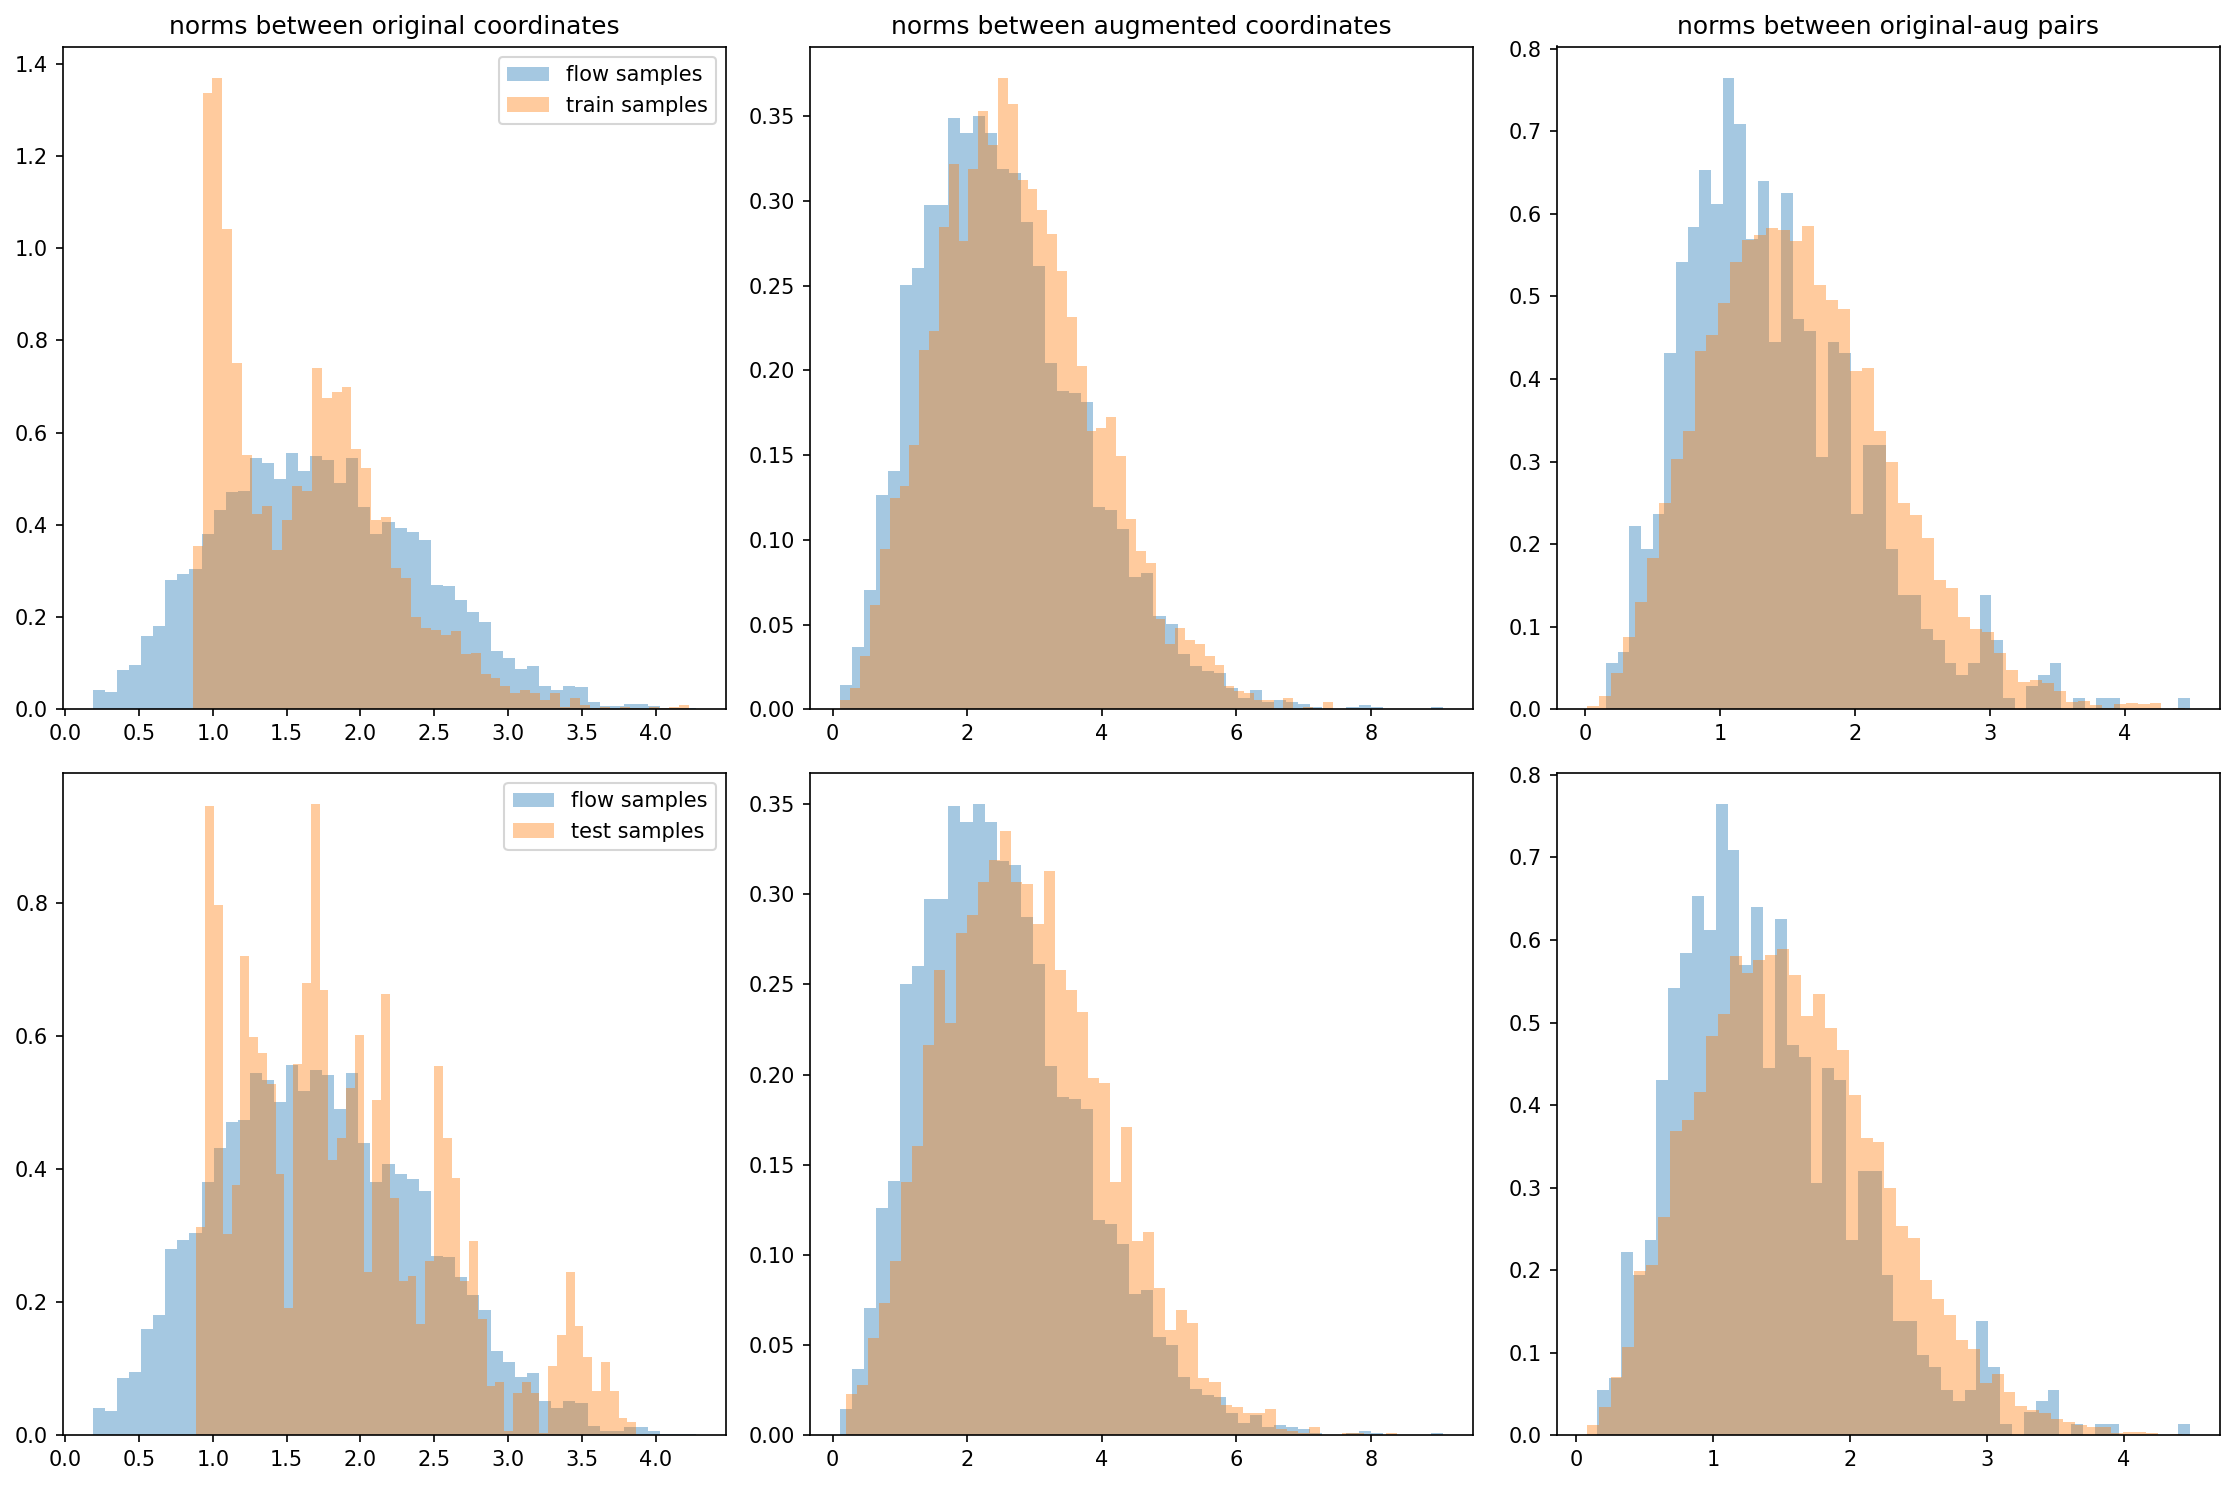

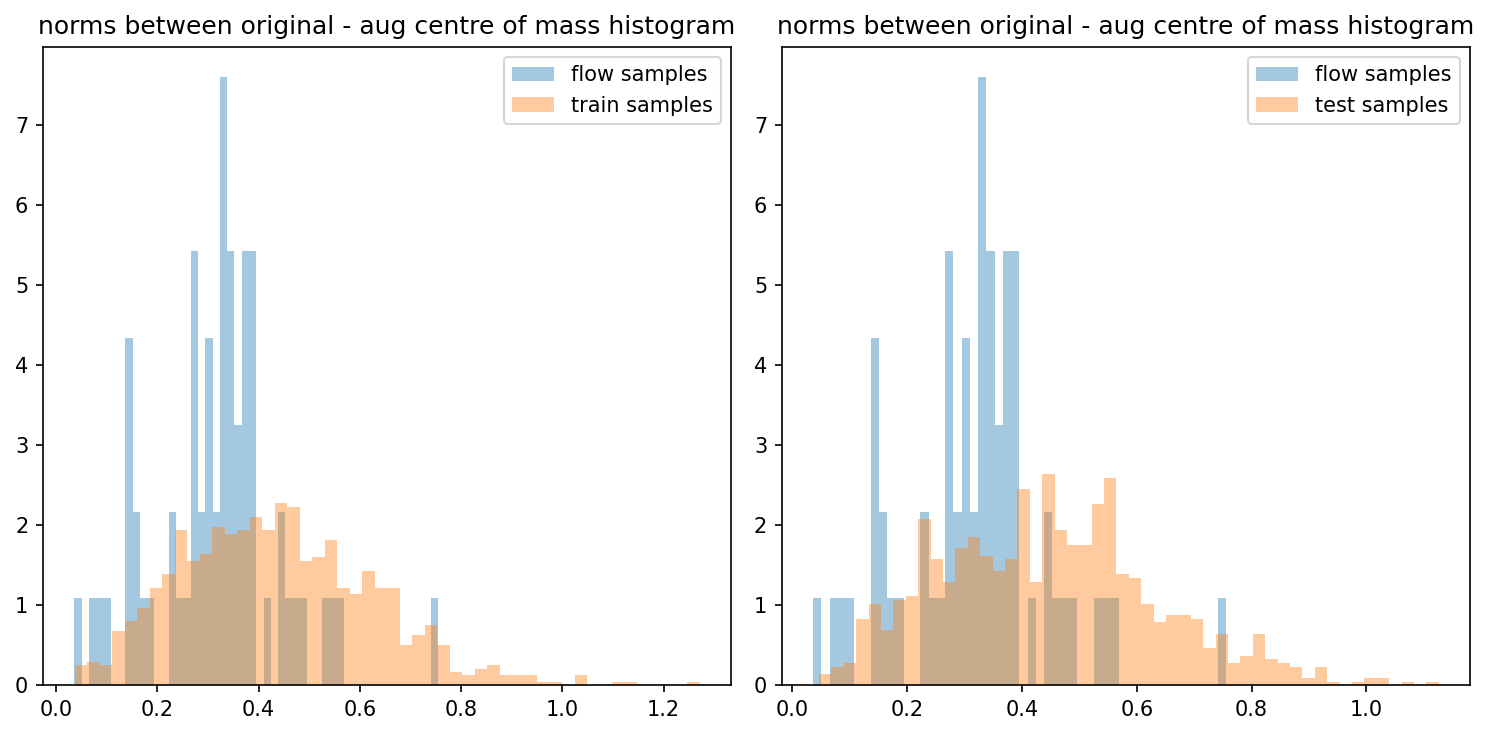

100%|█████████████████████████████████████████| 200/200 [04:49<00:00,  1.45s/it]


{'eval_log_lik': Array(-96.68531, dtype=float32), 'eval_marginal_log_lik': Array(-35.096584, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32), 'mean_aug_orig_norm': Array(0.3060173, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5477163, dtype=float32)}
NaN encountered in grad_norm history
NaN encountered in loss history
NaN encountered in eval_log_lik history
NaN encountered in eval_marginal_log_lik history
NaN encountered in max_abs_diff_log_prob_after_group_action history
NaN encountered in mean_abs_diff_log_prob_after_group_action history


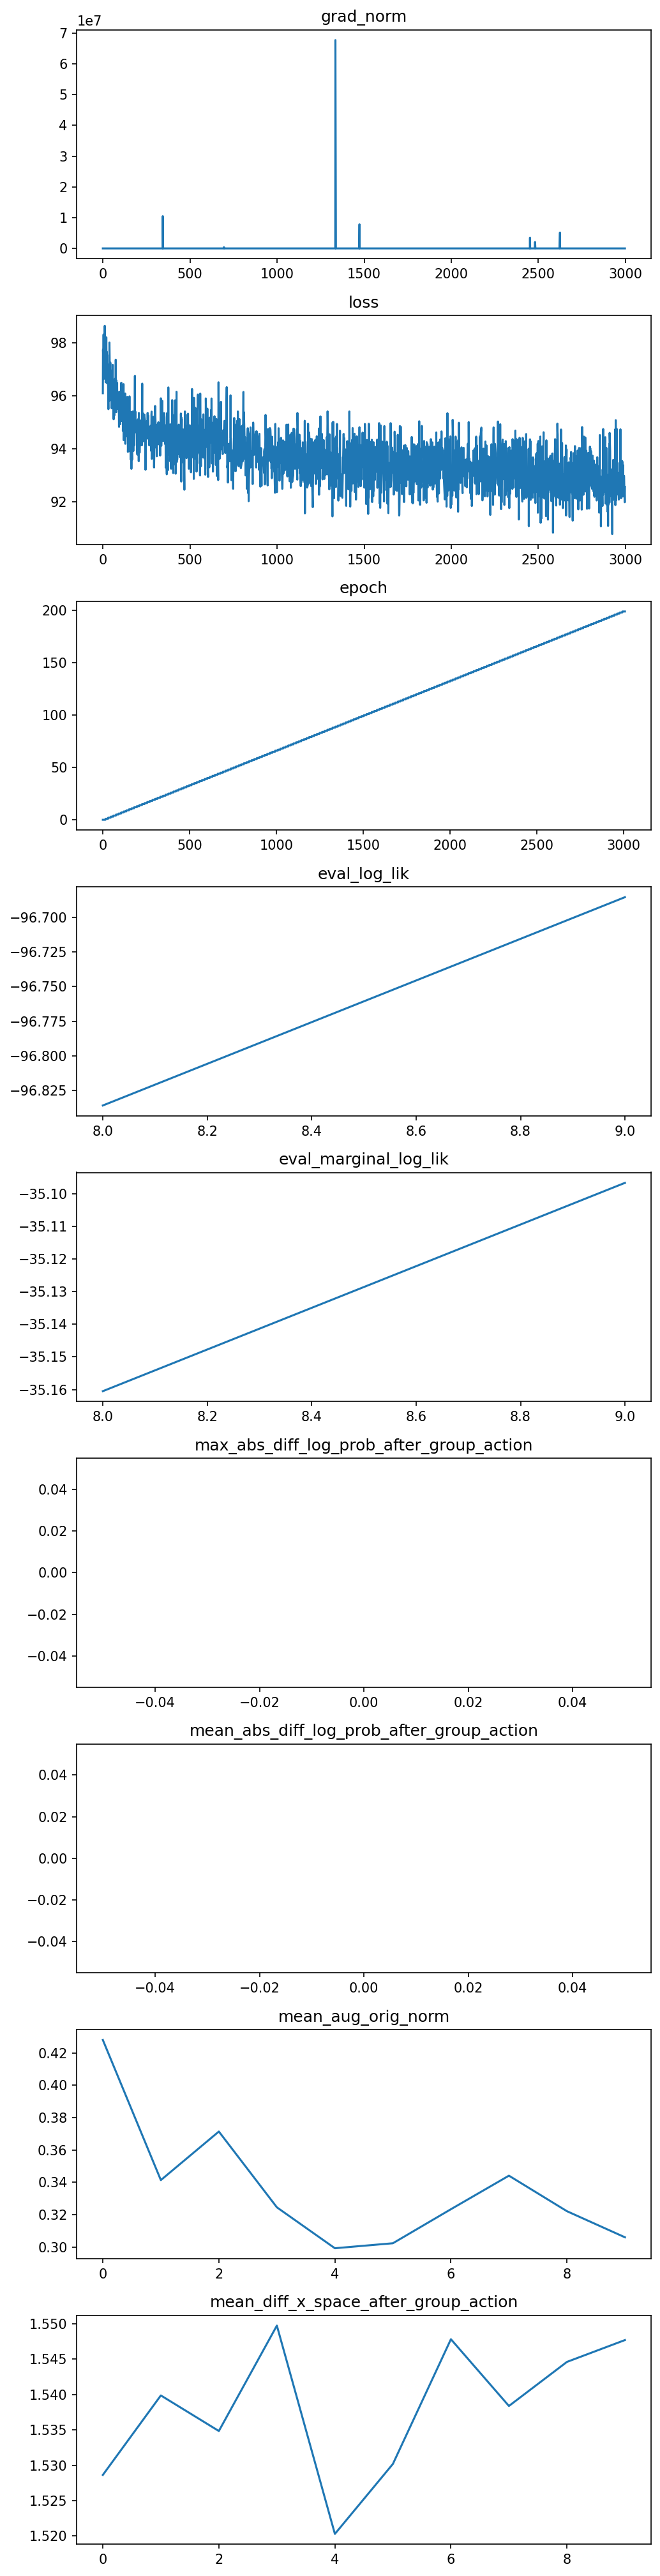

In [8]:
experiment_config = create_train_config(cfg, dim=dim, n_nodes=n_nodes,
                                        load_dataset=load_dataset)

logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)

In [9]:
train_data_original, test_data_original = load_dataset(cfg.training.batch_size, 
                                           1000, 
                                           1000)

In [10]:
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
train_data = original_dataset_to_joint_dataset(train_data_original, subkey,
                                               global_centering=cfg.target.aug_global_centering,
                                               aug_scale=cfg.target.aug_scale)
key, subkey = jax.random.split(key)
test_data = original_dataset_to_joint_dataset(test_data_original, subkey,
                                              global_centering=cfg.target.aug_global_centering,
                                               aug_scale=cfg.target.aug_scale)

[<Figure size 2250x1500 with 6 Axes>, <Figure size 1500x750 with 2 Axes>]

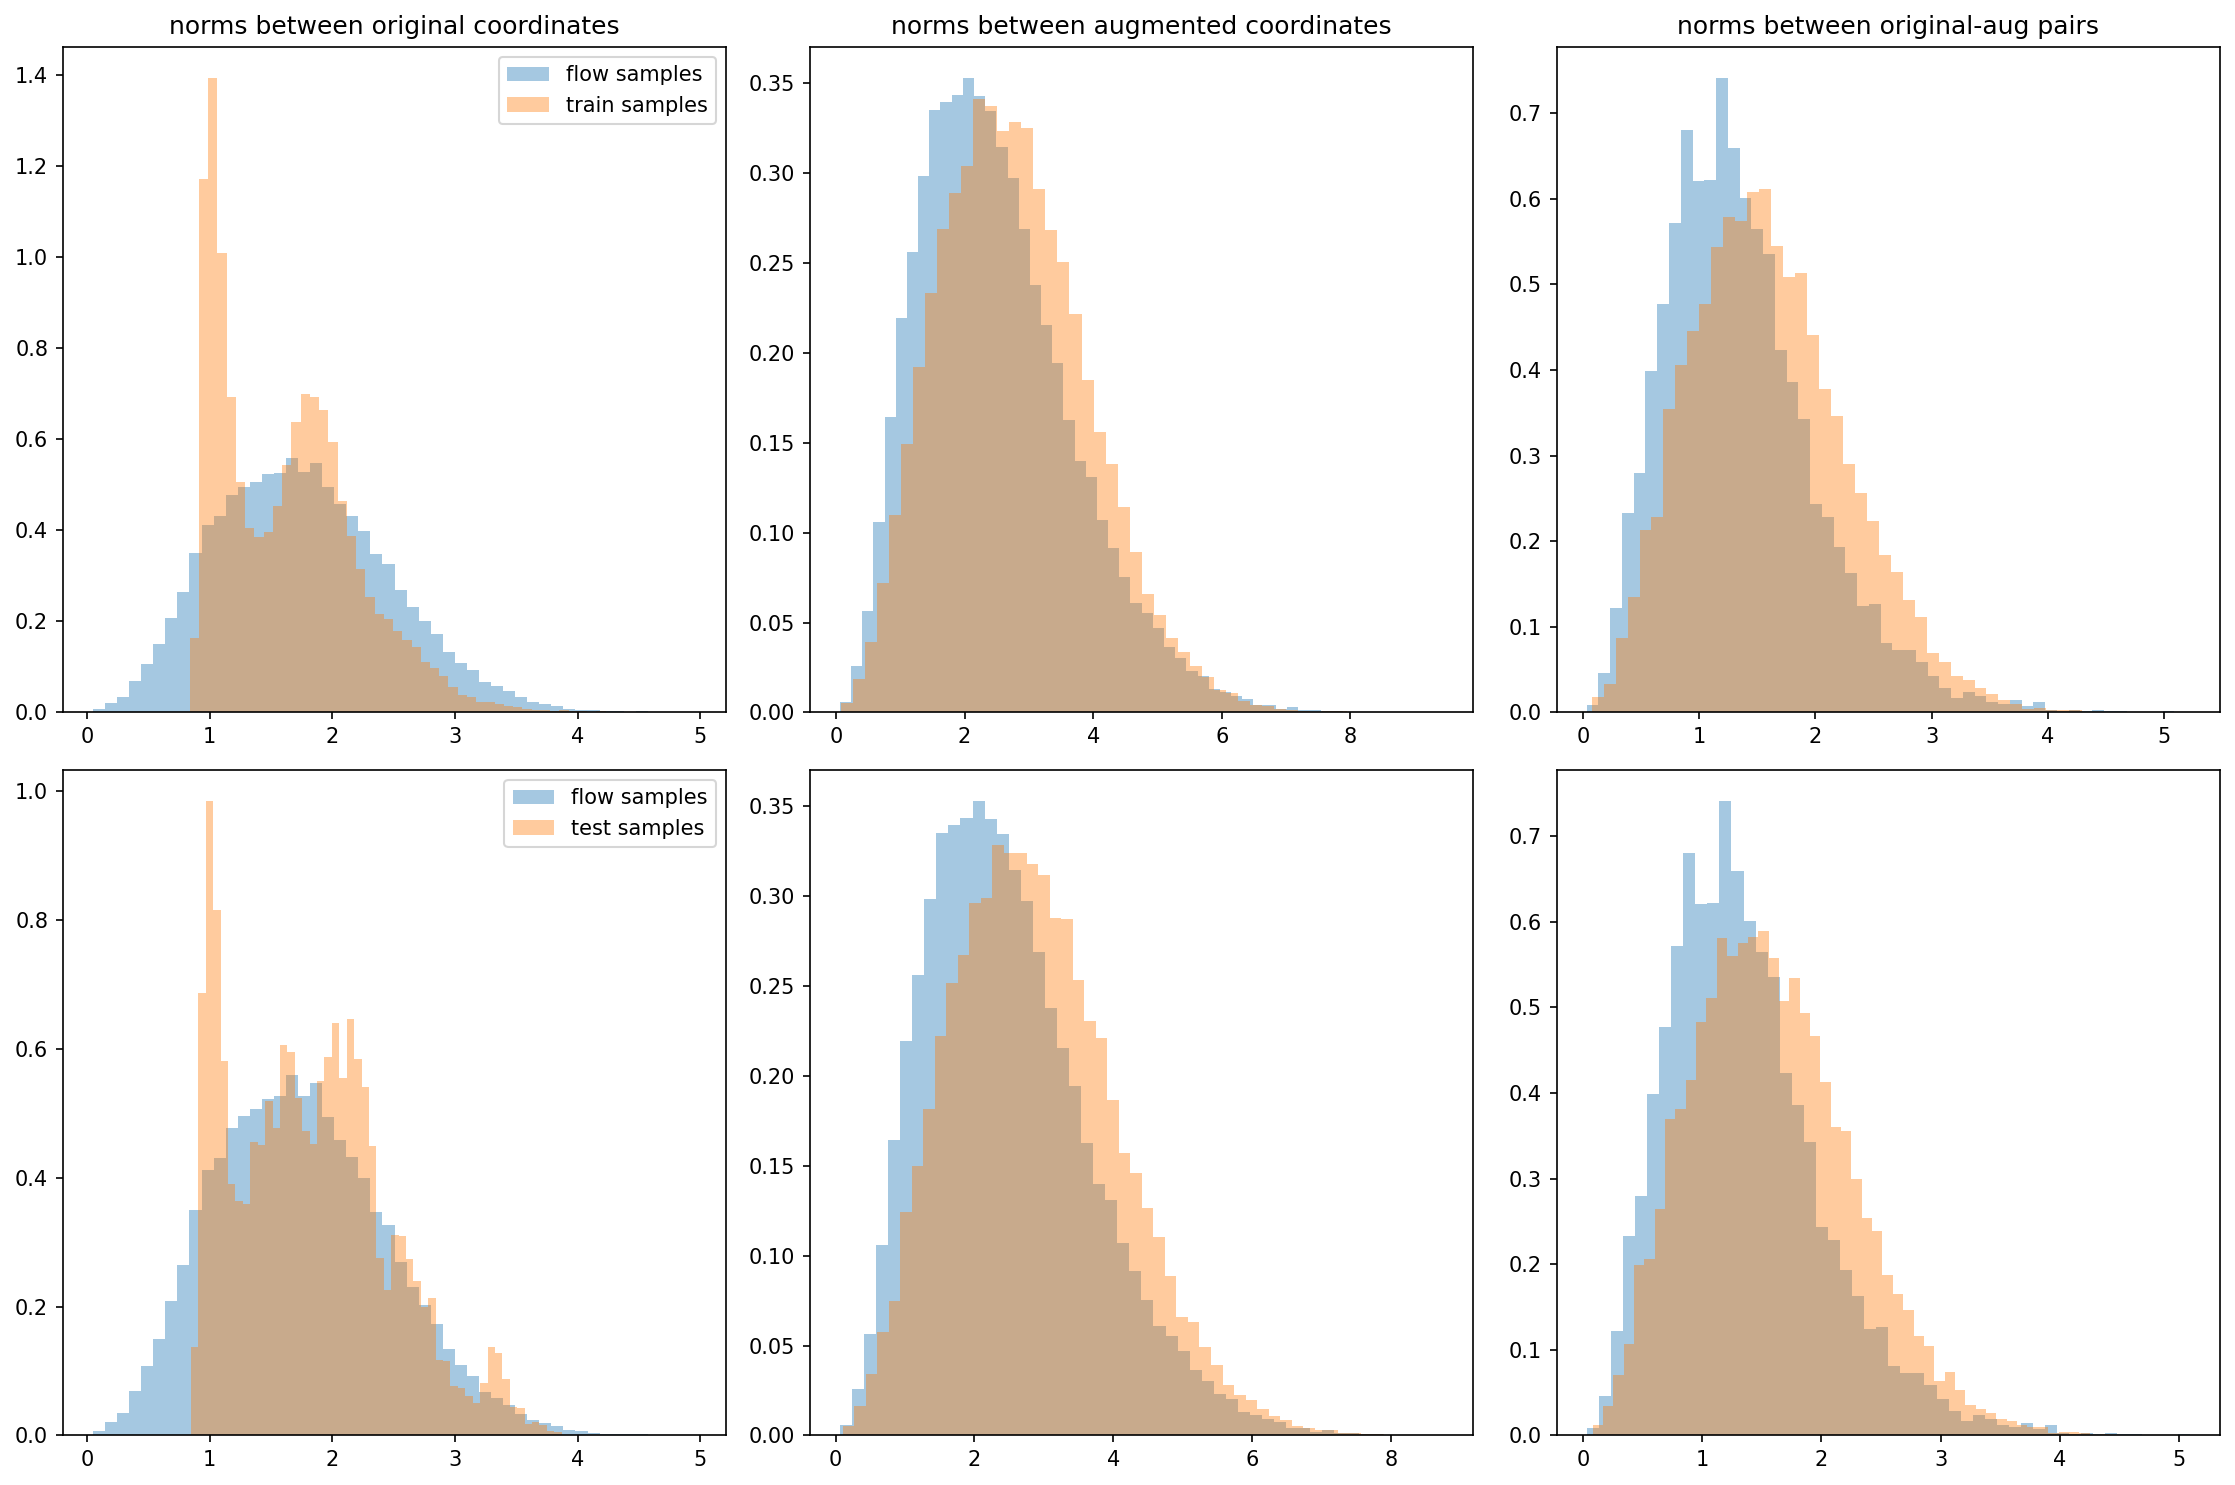

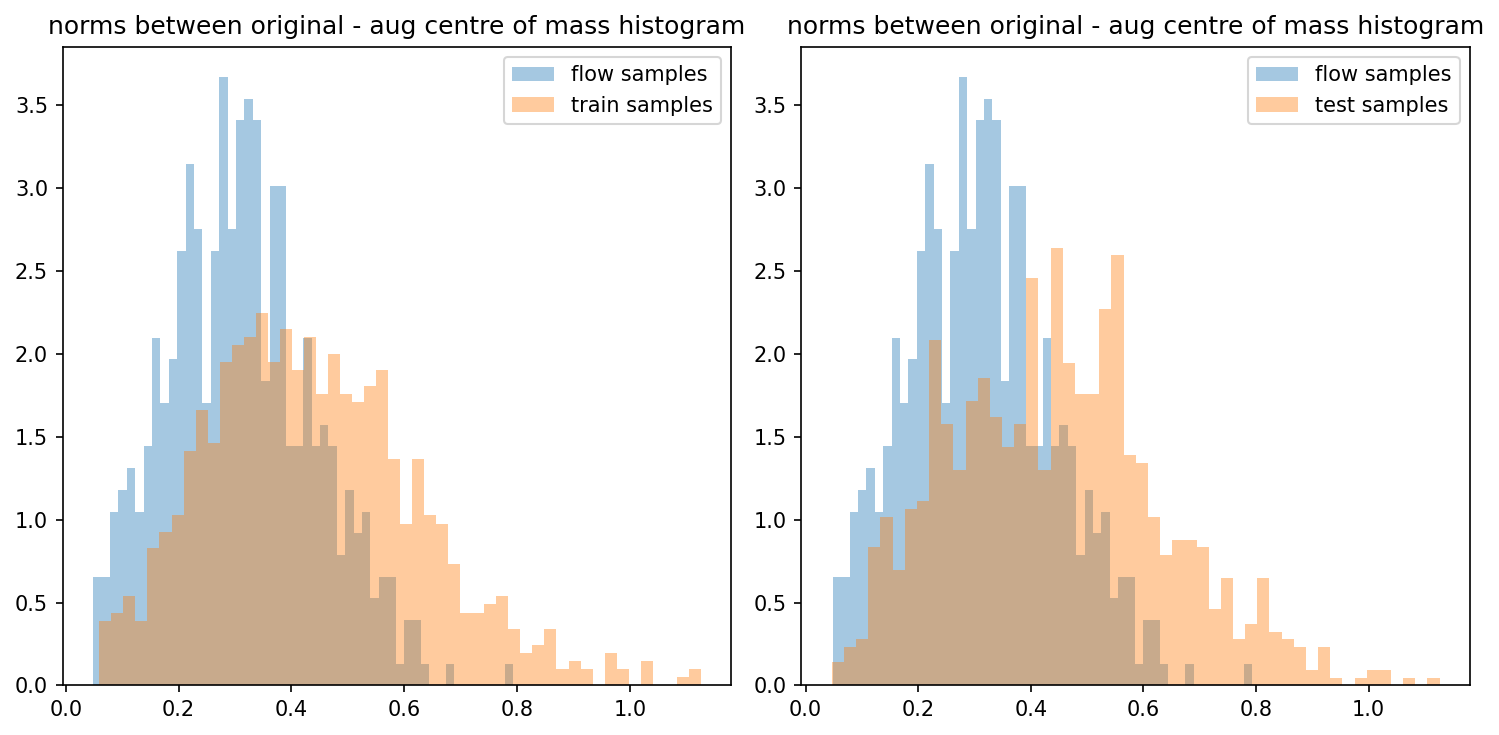

In [11]:
plot_batch_size = 512
sample_fn = sample_fn = lambda params, key, shape: sample_and_log_prob_fn.apply(params, key, shape)[0]
default_plotter(params, sample_fn, key, plot_batch_size, train_data, test_data)

In [12]:
eval_fn(params=params, x=test_data, flow_log_prob_fn=log_prob_fn,
                                flow_sample_and_log_prob_fn=sample_and_log_prob_fn,
                                target_log_prob=lj13.log_prob_fn,
                                key=jax.random.PRNGKey(1), 
        batch_size=cfg.training.batch_size,
        global_centering=cfg.target.aug_global_centering,
        aug_scale=cfg.target.aug_scale,
                                K=50)

{'ess': Array(0.01831563, dtype=float32),
 'eval_kl': Array(-62.98504, dtype=float32),
 'eval_log_lik': Array(-96.685326, dtype=float32),
 'eval_marginal_log_lik': Array(-33.638035, dtype=float32),
 'max_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32),
 'mean_abs_diff_log_prob_after_group_action': Array(nan, dtype=float32),
 'mean_aug_orig_norm': Array(0.30254158, dtype=float32),
 'mean_diff_x_space_after_group_action': Array(1.5244074, dtype=float32)}

# 